# Time series Forecasting on Corporation Favorita Grocery Stores

**Business Objective:** The business objective is to optimize inventory management by accurately **forecasting product demand** across various locations, ensuring adequate stock levels to meet customer demand while minimizing stockouts and overstock situations.


**Understanding the Current Situation:** The understanding of the current situation involves a comprehensive analysis of Corporation Favorita's inventory management and demand forecasting processes. This encompasses reviewing historical sales data, inventory levels, and customer demand patterns to identify trends and fluctuations. Additionally, it involves evaluating the effectiveness of existing processes, technology infrastructure, and decision-making frameworks. Consultation with stakeholders from various departments helps gather insights into business requirements, challenges, and opportunities. External factors such as market dynamics, economic conditions, and regulatory requirements are also considered. This holistic understanding forms the basis for developing strategies and implementing data-driven solutions to optimize inventory management and meet business objectives. 

**Data Mining Goals:** The aim of data mining is to build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores.. 

**Project Plan:** The project plan involves following the CRISP-DM framework to develop machine learning models for forecasting product demand in various locations for Corporation Favorita. This includes conducting a thorough data understanding phase to gather and explore relevant datasets, followed by data preparation to preprocess and clean the data for analysis. The modeling phase will involve building and evaluating machine learning models using techniques such as time series forecasting, regression analysis, and machine learning algorithms. Evaluation metrics such as Mean Absolute Error (MAE) and Mean Squared Error (MSE) will be used to assess model performance. Finally, the selected model will be deployed into production to generate forecasts for product demand, with ongoing monitoring and refinement as needed to ensure alignment with business objectives and requirements.

**Data for the Project:**

The data for this projects has been divided into 2. The first data set are for training and evaluation the machine learning model  while the last data set is for testing the model. 

The training dataset can be found in a database which will have to be accessed remotely and a zip file hosted on Github repository.

The test dataset for this project can be found in OneDrive.

**File Descriptions and Data Field Information**

**train.csv**

-   The training data, comprising time series of features store_nbr, family, 
    and onpromotion as well as the target sales.

-   **store_nbr** identifies the store at which the products are sold.

-   **family** identifies the type of product sold.

-   **sales** gives the total sales for a product family at a particular store
    at a given date. Fractional values are possible since products can be sold in 
    fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

-   **onpromotion** gives the total number of items in a product family that
    were being promoted at a store at a given date.

**test.csv**

-   The test data, having the same features as the training data. You will predict the target sales for the dates in this file.

-   The dates in the test data are for the 15 days after the last date in the training data.

**transaction.csv**

-   Contains date, store_nbr and transaction made on that specific date.

**sample_submission.csv**

-   A sample submission file in the correct format.

**stores.csv**

-   Store metadata, including city, state, type, and cluster.

-   cluster is a grouping of similar stores.

**oil.csv**

-   **Daily oil price** which includes values during both the train and
     test data timeframes. (Ecuador is an oil-dependent country and its
     economical health is highly vulnerable to shocks in oil prices.)

**holidays_events.csv**
-   Holidays and Events, with metadata

> **NOTE**: The attention was to be paid particularly to the **transferred** column, > > as explained. It was noted that a holiday officially designated as **transferred** > fell on a specific calendar day but had been moved to another date by the >  government. Such a transferred day was described as more akin to a normal day than a > holiday. To determine the day it was celebrated, it was instructed to locate the > corresponding row where the type was **Transfer.** An example was provided, citing the > holiday Independencia de Guayaquil, which was transferred from 2012-10-09 to > 2012-10-12, indicating that it was celebrated on 2012-10-12. It was clarified that > days labeled as **Bridge** were additional days added to a holiday to extend the break > across a long weekend. These additional days were often compensated for by **Work > Day,** which referred to a day not typically scheduled for work (e.g., Saturday) > meant to offset the extended holiday. Furthermore, it was mentioned that additional > holidays were days added to a regular calendar holiday, such as Christmas, > typically including Christmas Eve as a holiday.

**Additional Notes**

-   Wages in the public sector are paid every two weeks on the 15th and
    on the last day of the month. Supermarket sales could be affected
    by this.

-   A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People
    rallied in relief efforts donating water and other first need
    products which greatly affected supermarket sales for several
    weeks after the earthquake.


### `Analytical Questions`:

> 1. Is the train dataset complete (has all the required dates)?
> 2. Which dates have the lowest and highest sales for each year (excluding days the store was closed)?
> 3. Compare the sales for each month across the years and determine which month of which year had the highest sales.
> 4. Did the earthquake impact sales?
> 5. Are certain stores or groups of stores selling more products? (Cluster, city, state, type)
> 6. Are sales affected by promotions, oil prices and holidays?
> 7. What analysis can we get from the date and its extractable features?
> 8. Which product family and stores did the promotions affect.
> 9. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)
> 10. Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.


### `Hypotheses`

`Null Hypothesis`: The payment of wages in the public sector on the 15th and last days of the month does not influence store sales.

`Alternate Hypothesis`: The payment of wages in the public sector on the 15th and last days of the month significantly influences store sales.

# `DATA UNDERSTANDING`

In [4]:
# Data Analysis and Manipulation of Packages

# Data handling
import pyodbc     
from dotenv import dotenv_values   
import pandas as pd
import numpy as np
from scipy.stats import t


# Visualization
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Processing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn. linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn. preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.impute import SimpleImputer
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import calplot
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import make_scorer

# Other packages
import zipfile
import os
import warnings
warnings.filterwarnings('ignore')
import shutil

# Display all columns and rows 
pd.set_option('display.max_columns', None)

### Loading Datasets

In [5]:
# Load from SQL Database source

# Load environment variables from .env file into a dictionary
from dotenv import dotenv_values
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = os.getenv("DB_SERVER")
database = os.getenv("DB_NAME")
username = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")

# Create a connection string
connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Connect to the database
import pyodbc
connection = pyodbc.connect(connection_string)


In [6]:
# SQL query to extract the data 
query = "SELECT * from dbo.oil"
 
 # Execute the SQL query to load data into pandas Dataframe
oil= pd.read_sql(query, connection)

oil.to_csv('../datasets/stores.csv')

oil.head(5)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [7]:
# SQL query to extract the data 
query = "SELECT * from dbo.holidays_events"
 
 # Execute the SQL query to load data into pandas Dataframe
holidays_events= pd.read_sql(query, connection)

holidays_events.to_csv('../datasets/holidays_events.csv')#

holidays_events.head(5)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [8]:
# SQL query to extract the data 
query = "SELECT * from dbo.stores"
 
 # Execute the SQL query to load data into pandas Dataframe
stores= pd.read_sql(query, connection)

stores.to_csv('../datasets/stores.csv')

stores.head(5)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [9]:
# extract and load the file
zip_file = '../datasets/store-sales-forecasting.zip'

# Extract the zip file in the same directory
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('../datasets/store-sales-forecasting')

In [10]:
train = pd.read_csv('../datasets/store-sales-forecasting/train.csv')
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [12]:
transactions = pd.read_csv('../datasets/store-sales-forecasting/transactions.csv')
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [13]:
test=pd.read_csv('../datasets/test_datasets/test.csv')
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [14]:
sample_submission=pd.read_csv('../datasets/test_datasets/sample_submission.csv')
sample_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


### EXPLORATORY DATA ANALYSIS

In [23]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [24]:
# Identify the unique features of the 'type' column

holidays_events['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

The holidays whose type are designated as 'Transfer' are the holidays that occured on a particalar date but were observed on a different date. These holidays officially fall on the specified calendar date but were moved to another date by the government. This could be because the holidays occured in a weekend, or for any other reason. Since we are interested in the store sales performance on the actual days that holidays were observed, the holidays with type as 'Trasfer' will be isolated, and their holiday date changed to the actual date each holiday was observed.

In [25]:
# Filter holidays with 'type' as 'Transfer'
transferred_holidays = holidays_events[holidays_events['type'] == 'Transfer']

# Display the holidays with 'type' as 'Transfer'
transferred_holidays

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


#### Function to change the date of transferred holidays to the date the holidays were observed

In [26]:

def change_transferred_holidays_date(row):
    if row['type'] == 'Transfer':
        corresponding_row = holidays_events[(holidays_events['description'] == row['description']) & 
                                               (holidays_events['type'] != 'Transfer') & 
                                               (holidays_events['date'] != row['date'])]
        if not corresponding_row.empty:
            return corresponding_row.iloc[0]['date']
    return row['date']

# Apply the function to change the date of transferred holidays to the date the holidays were observed
holidays_events['date'] = holidays_events.apply(change_transferred_holidays_date, axis=1)

# Drop any duplicate rows created
holidays_events.drop_duplicates(inplace=True)

holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [27]:
# Load the first five rows of the stores dataset

stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [28]:
# Check the datatypes of the columns in stores dataset

stores.dtypes

store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object

In [29]:
# Change the datatypes of the columns (except 'store_nbr') in stores dataset to category for consistency and ease in handling the dataset
stores['city'] = stores['city'].astype('category')
stores['state'] = stores['state'].astype('category')
stores['type'] = stores['type'].astype('category')
stores['cluster'] = stores['cluster'].astype('category')

# Verify the changes
stores.dtypes

store_nbr       int64
city         category
state        category
type         category
cluster      category
dtype: object

In [30]:
# Create a dictionary of the datasets

data = {'holiday': holidays_events, 'stores': stores, 'oil': oil, 'transactions': transactions, 'train': train, 'test': test, 'sample_submission': sample_submission}

In [31]:
# Check the datatypes and presence of missing values in each of the datasets
# Use '\033[1mtext\033[0m' to make text bold

for df, dataset in data.items():
    print(f'\033[1mFor {df} dataset\033[0m:')
    dataset.info()
    print('_'*45)
    print('\n')

For holiday dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB
_____________________________________________


For stores dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   store_nbr  54 non-null     int64   
 1   city       54 non-null     category
 2   state      54 non-null     category
 3   type       54 non-null     categor

In [32]:
# Check the shape, and the presence of missing values and duplicates in each of the datasets
# Use '\033[1mtext\033[0m' to make text bold

for df, dataset in data.items():
    print(f'\033[1mFor {df} dataset\033[0m')
    print(f'Shape: {dataset.shape}')
    print(f'Missing values = {dataset.isna().sum().sum()}')
    print(f'Duplicates = {dataset.duplicated().sum()}')
    print('_'*30)
    print('\n')

For holiday dataset
Shape: (350, 6)
Missing values = 0
Duplicates = 0
______________________________


For stores dataset
Shape: (54, 5)
Missing values = 0
Duplicates = 0
______________________________


For oil dataset
Shape: (1218, 2)
Missing values = 43
Duplicates = 0
______________________________


For transactions dataset
Shape: (83488, 3)
Missing values = 0
Duplicates = 0
______________________________


For train dataset
Shape: (3000888, 8)
Missing values = 0
Duplicates = 0
______________________________


For test dataset
Shape: (28512, 5)
Missing values = 0
Duplicates = 0
______________________________


For sample_submission dataset
Shape: (28512, 2)
Missing values = 0
Duplicates = 0
______________________________




In [33]:
print(train.columns)
print(transactions.columns)

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'month',
       'year'],
      dtype='object')
Index(['date', 'store_nbr', 'transactions'], dtype='object')


In [34]:
print(train.dtypes)
print(transactions.dtypes)

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
month                   int32
year                    int32
dtype: object
date            object
store_nbr        int64
transactions     int64
dtype: object


In [35]:
#change datatype of transactions date to datetime
transactions['date'] = pd.to_datetime(transactions['date'])
# Merge transactions dataset to train on 'date' and 'store_nbr' columns
df1 = pd.merge(train, transactions, on=['date', 'store_nbr'], how='left')
df1.head()

,id,date,store_nbr,family,sales,onpromotion,month,year,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,1,2013,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,1,2013,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,1,2013,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,1,2013,NaN


In [36]:
# Merge holiday dataset to df1 on 'date' column
df2 = pd.merge(df1, holidays_events, on='date', how='left')
df2.head()

,id,date,store_nbr,family,sales,onpromotion,month,year,transactions,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [37]:
# Merge oil dataset to df2 on 'date' column
df3 = pd.merge(df2, oil, on='date', how='left')
df3.head()

,id,date,store_nbr,family,sales,onpromotion,month,year,transactions,type,locale,locale_name,description,transferred,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN


In [38]:
# Merge store dataset to df3 on 'store_nbr' column
df4 = pd.merge(df3, stores, on='store_nbr', how='left')
df4.head()

,id,date,store_nbr,family,sales,onpromotion,month,year,transactions,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13


In [39]:
# Check for missing values after merging the datasets

df4.isna().sum().sum()

13972299

There are dates with values on a dataset that are not represented at all on another dataset. When these datasets are merged, the rows of such dates will have missing values. This is one of the reasons for the huge amount of missing values in the merged dataset. Another reason is that the oil dataset has some missing values of it's own which were introduced to the merged dataset. These missing values will be filled subsequently.

In [40]:
# Check for duplicates after merging the datasets

df4.duplicated().sum()

0

In [41]:
# Create a copy of the merged dataset for further exploration

df = df4.copy()
df.to_csv('../datasets/df.csv', index=False)
df.head()

,id,date,store_nbr,family,sales,onpromotion,month,year,transactions,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13


In [42]:
# Drop the 'id' column as it is unnecessary

df.drop(columns=['id'], inplace=True)
df.head()

,date,store_nbr,family,sales,onpromotion,month,year,transactions,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13


In [43]:
# Identify the features of 'type_x' column in the merged dataset

df['type_x'].unique()

array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer',
       'Bridge'], dtype=object)

The 'type' column of the holiday dataset shares the same qualities as this column, it has been noted. To make this column simpler to identify, it will now be called "holiday_type." Additionally, it is noted that this column contains missing values, as indicated by the existence of 'nan'. This will be taken care of later when dealing with missing values.

In [44]:
# Identify the features of 'type_y' column in the merged dataset

df['type_y'].unique()

['D', 'C', 'B', 'E', 'A']
Categories (5, object): ['A', 'B', 'C', 'D', 'E']

Note that this column's properties match those of the store dataset's "type" column. The name of this column will be changed to "store_type" to make it easier to recognise.


In [45]:
# Rename 'type_x', 'dcoilwtico' and type_y' to 'holiday_type', 'oil_price' and 'store_type' respectively

df = df.rename(columns={'type_x': 'holiday_type', 'dcoilwtico': 'oil_price', 'type_y': 'store_type'})
df.head()

,date,store_nbr,family,sales,onpromotion,month,year,transactions,holiday_type,locale,locale_name,description,transferred,oil_price,city,state,store_type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,1,2013,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13


### Filling Missing Values

In [46]:
# Identify the columns with missing values

df.isna().sum()

date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
month                 0
year                  0
transactions     249117
holiday_type    2553606
locale          2553606
locale_name     2553606
description     2553606
transferred     2553606
oil_price        955152
city                  0
state                 0
store_type            0
cluster               0
dtype: int64

The missing values in the transactions column will be filled with 0 because it represents the absence of transactions on those days.

In [47]:
# Fill the missing values in the transactions column with 0

df['transactions'].fillna(0, inplace=True)
df.isna().sum()

date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
month                 0
year                  0
transactions          0
holiday_type    2553606
locale          2553606
locale_name     2553606
description     2553606
transferred     2553606
oil_price        955152
city                  0
state                 0
store_type            0
cluster               0
dtype: int64

For holiday_type, locale, locale_name, description and transferred columns, there are equal number of missing values. This is because these columns are from the holiday dataset, and they represent the days where there were no holidays. These empty cells will be filled with 'No holiday' for easy identification.

In [48]:
# Fill the missing values in type_x, locale, locale_name, description and transferred columns with 'No holiday'
columns_to_fill = ['holiday_type', 'locale', 'locale_name', 'description', 'transferred']
for column in columns_to_fill:
        df[column].fillna('No holiday', inplace=True)

# Confirm that there are no more missing values in these columns
df.isna().sum()

date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
month                0
year                 0
transactions         0
holiday_type         0
locale               0
locale_name          0
description          0
transferred          0
oil_price       955152
city                 0
state                0
store_type           0
cluster              0
dtype: int64

In [49]:
# Filter rows where oil_price is null
missing_oil_prices = df[df['oil_price'].isnull()]

# Extract unique dates with missing oil prices
dates_with_missing_oil_prices = missing_oil_prices['date'].unique()

# Print the dates
print("Dates with missing oil prices:")
print(dates_with_missing_oil_prices)

Dates with missing oil prices:
<DatetimeArray>
['2013-01-01 00:00:00', '2013-01-05 00:00:00', '2013-01-06 00:00:00',
 '2013-01-12 00:00:00', '2013-01-13 00:00:00', '2013-01-19 00:00:00',
 '2013-01-20 00:00:00', '2013-01-21 00:00:00', '2013-01-26 00:00:00',
 '2013-01-27 00:00:00',
 ...
 '2017-07-15 00:00:00', '2017-07-16 00:00:00', '2017-07-22 00:00:00',
 '2017-07-23 00:00:00', '2017-07-29 00:00:00', '2017-07-30 00:00:00',
 '2017-08-05 00:00:00', '2017-08-06 00:00:00', '2017-08-12 00:00:00',
 '2017-08-13 00:00:00']
Length: 521, dtype: datetime64[ns]


<Axes: >

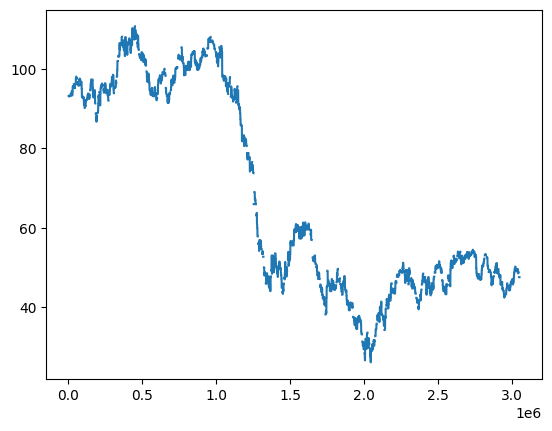

In [50]:
# Visualize the trend of oil prices before filling the missing values in the 'oil_price' column

df['oil_price'].plot()

The chart above reveals that there is a trend formed as the oil price changes. For this reason, the missing values in the 'oil_price' column will be filled using backward fill to ensure continuity in the trend.

<Axes: >

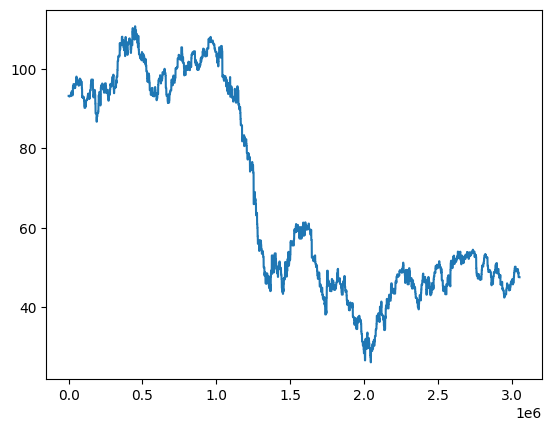

In [51]:
# Fill the missing values in the 'oil_price' column using backward fill
df['oil_price'].fillna(method='bfill', inplace=True)

# Visualize the trend of oil prices after filling the missing values
df['oil_price'].plot()

In [52]:
# Confirm that there are no more missing values in the merged dataset

df.isna().sum().sum()

0

After adding the missing numbers to the 'oil_price' column, the pattern continued as previously demonstrated.

#### Create the 'holiday_status' column

In [53]:
# Check the unique values of the 'holiday_type' column

df['holiday_type'].unique()

array(['Holiday', 'No holiday', 'Work Day', 'Additional', 'Event',
       'Transfer', 'Bridge'], dtype=object)

In [54]:
# Function to map holiday type to holiday status
def map_holiday_status(holiday_type):
    if holiday_type in ['No holiday', 'Work Day']:
        return 'No holiday'
    else:
        return 'Holiday'

# Add the 'holiday_status' column using the 'holiday_type' column
df['holiday_status'] = df['holiday_type'].apply(map_holiday_status)
df.head()

,date,store_nbr,family,sales,onpromotion,month,year,transactions,holiday_type,locale,locale_name,description,transferred,oil_price,city,state,store_type,cluster,holiday_status
0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday
1,2013-01-01,1,BABY CARE,0.0,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday
2,2013-01-01,1,BEAUTY,0.0,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday
3,2013-01-01,1,BEVERAGES,0.0,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday
4,2013-01-01,1,BOOKS,0.0,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday


In [55]:
# Check the unique values of the 'holiday_status' column

df['holiday_status'].unique()

array(['Holiday', 'No holiday'], dtype=object)

In [56]:
# Set the 'date' column as index

df = df.set_index('date')
df.head()

,store_nbr,family,sales,onpromotion,month,year,transactions,holiday_type,locale,locale_name,description,transferred,oil_price,city,state,store_type,cluster,holiday_status
date,,,,,,,,,,,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday
2013-01-01,1,BABY CARE,0.0,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday
2013-01-01,1,BEAUTY,0.0,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday
2013-01-01,1,BEVERAGES,0.0,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday
2013-01-01,1,BOOKS,0.0,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday


In [57]:
# Rename df to train_data

train_data = df.copy()

In [58]:
# Display random sample of 10 rows

train_data.sample(10, random_state = 42)

,store_nbr,family,sales,onpromotion,month,year,transactions,holiday_type,locale,locale_name,description,transferred,oil_price,city,state,store_type,cluster,holiday_status
date,,,,,,,,,,,,,,,,,,
2014-01-07,23,DAIRY,471.000,0,1,2014,1135.0,No holiday,No holiday,No holiday,No holiday,No holiday,93.309998,Ambato,Tungurahua,D,9,No holiday
2014-12-05,1,BEAUTY,1.000,0,12,2014,2028.0,Additional,Local,Quito,Fundacion de Quito-1,False,65.889999,Quito,Pichincha,D,13,Holiday
2014-07-06,45,HOME APPLIANCES,0.000,0,7,2014,4626.0,No holiday,No holiday,No holiday,No holiday,No holiday,104.190002,Quito,Pichincha,A,11,No holiday
2014-05-02,20,LAWN AND GARDEN,0.000,0,5,2014,0.0,No holiday,No holiday,No holiday,No holiday,No holiday,100.089996,Quito,Pichincha,B,6,No holiday
2014-02-25,25,HOME AND KITCHEN II,0.000,0,2,2014,705.0,No holiday,No holiday,No holiday,No holiday,No holiday,102.199997,Salinas,Santa Elena,D,1,No holiday
2014-01-26,49,PRODUCE,7866.909,0,1,2014,2744.0,No holiday,No holiday,No holiday,No holiday,No holiday,95.820000,Quito,Pichincha,A,11,No holiday
2014-11-23,49,GROCERY II,107.000,0,11,2014,3096.0,No holiday,No holiday,No holiday,No holiday,No holiday,75.739998,Quito,Pichincha,A,11,No holiday
2013-08-24,20,PRODUCE,0.000,0,8,2013,0.0,Holiday,Local,Ambato,Fundacion de Ambato,False,105.879997,Quito,Pichincha,B,6,Holiday
2015-08-02,4,CELEBRATION,11.000,0,8,2015,1716.0,No holiday,No holiday,No holiday,No holiday,No holiday,45.250000,Quito,Pichincha,D,9,No holiday


### Visualisations

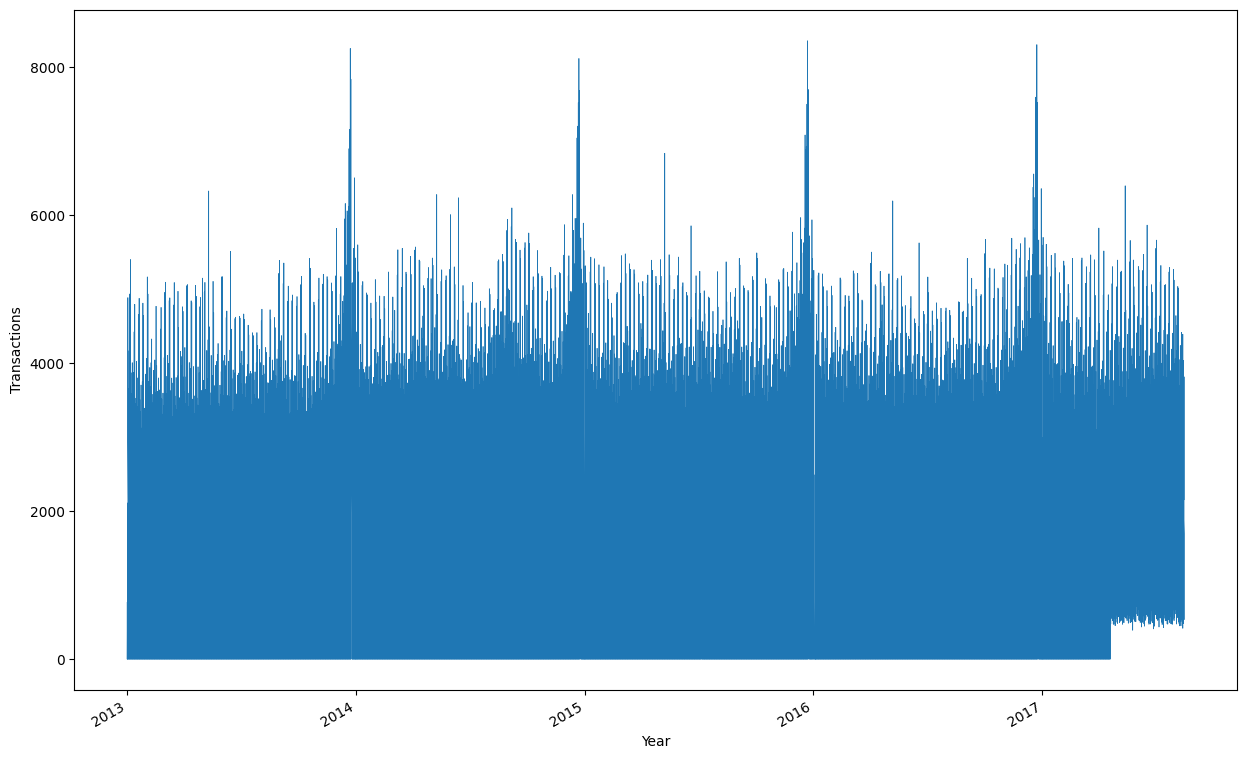

In [59]:
# Visualize the 'transactions' column

plt.figure(figsize=(15,10))
ax = train_data['transactions'].plot(linewidth=0.5)
ax.set_ylabel('Transactions')
ax.set_xlabel('Year')
plt.show()

Transactions are at their peak at the end of the year, as the plot above illustrates. This indicates that the dataset has seasonality.


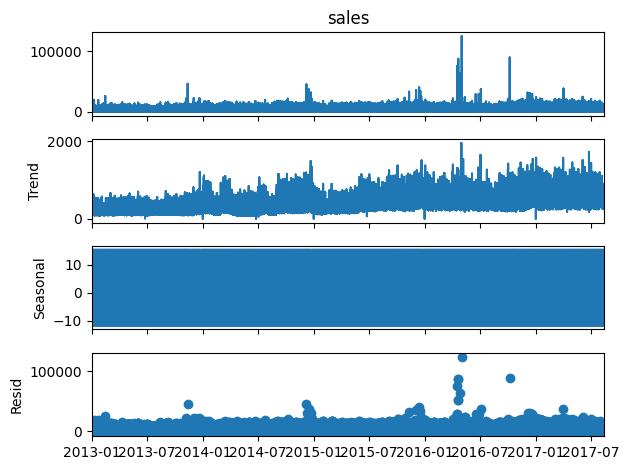

In [60]:
# Perform seasonal decomposition

result = seasonal_decompose(train_data['sales'], model='additive', period=365)
result.plot()
plt.show()





<font color='blue'>**Trend Component**</font>: This element signifies the long-term movement within the dataset, revealing the underlying pattern that persists over time. In our sales dataset, it reflects a consistent growth in sales over the years, indicating a steady upward trend.

<font color='blue'>**Seasonal Component**</font>: This aspect captures the repetitive patterns occurring at fixed intervals, like daily, weekly, or yearly cycles. These patterns are often tied to external factors such as seasons or holidays. In our dataset, the clearly visible seasonal component suggests recurring patterns, likely influenced by seasonal factors impacting sales.

<font color='blue'>**Residual Component (or Error)**</font>: This component showcases the random variations or noise present in the data after removing the trend and seasonal effects. In our dataset, the residual component displays less structured behavior, representing the unexplained fluctuations beyond trend and seasonality.

Performing seasonal decomposition serves several pivotal purposes:

<font color='blue'>**Pattern Identification**</font>: Decomposition facilitates the identification and isolation of underlying patterns, trends, and seasonal influences in the data. This insight is crucial for making informed predictions and strategic decisions.

<font color='blue'>**Anomaly Detection**</font>: By separating out trend and seasonal components, it becomes easier to detect unusual or anomalous behavior in the data. This helps in identifying deviations from the expected pattern, which could signify important events or anomalies.

<font color='blue'>**Forecasting**</font>: Decomposition enables modeling and forecasting of each component separately, leading to more accurate predictions. For instance, forecasting trend and seasonality individually and then combining them can enhance prediction accuracy.

<font color='blue'>**Data Analysis and Visualization**</font>: Decomposition offers a cleaner and clearer approach to visualizing and analyzing individual components, facilitating effective communication of insights to stakeholders.

<font color='blue'>**Modeling**</font>: Applying time series forecasting models to individual components can lead to improved modeling results. Models like ARIMA or Exponential Smoothing are often more effective when applied to decomposed components, enhancing forecasting accuracy.

---



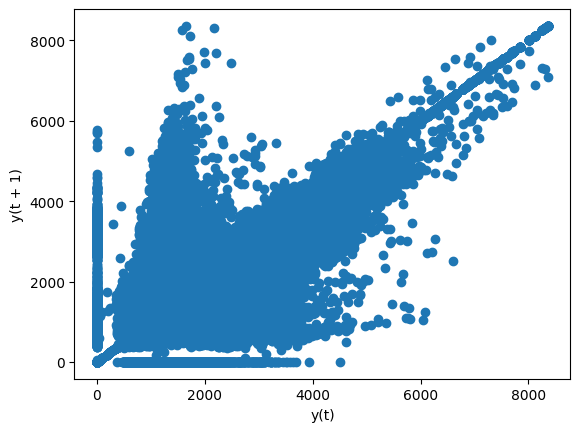

In [61]:
# Create a lag plot

pd.plotting.lag_plot(train_data['transactions'], lag=1)
plt.show()

When performing time series analysis, a lag plot is a useful graphical tool for analysing a dataset's autocorrelation or serial correlation. The connection between a time series and a lagged version of itself is known as autocorrelation, and it can reveal important details about the underlying structure of the data. The lag plot facilitates the following tasks: recognising serial correlation, evaluating stationarity, detecting seasonality, visualising autocorrelation, and examining residuals.

Our dataset's lag plot above shows that the plot contains certain pattern deviations, clustering, and linearity.


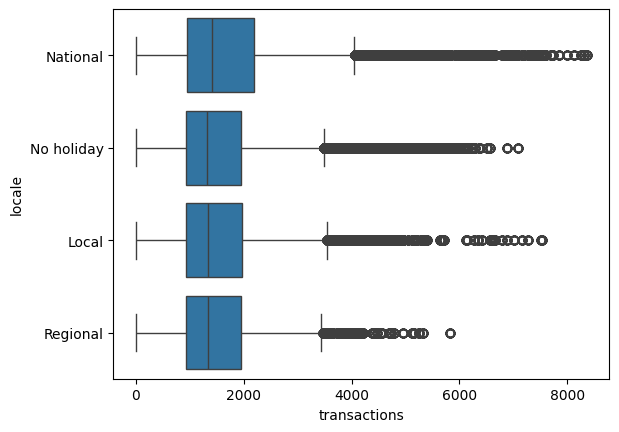

In [62]:
# Create a boxplot of the 'transactions' column grouped by 'locale'
sns.boxplot(x='transactions', y='locale', data=train_data)


# Show the plot
plt.show()

The median, represented by the line within each box in the box plot, signifies the central tendency of the data. In this plot, it's noteworthy that the median transaction count is highest for 'National holidays'. Moreover, the length of the boxes indicates the variability in transactions, with 'National holidays' exhibiting the longest box. Outlying data points beyond the whiskers of the boxes indicate extreme values or anomalies, and notably, 'National holidays' has the most extreme values.

<font color='blue'>Based on the boxplot analysis, there's clear evidence of significant variations in transaction patterns among different locales.</font>

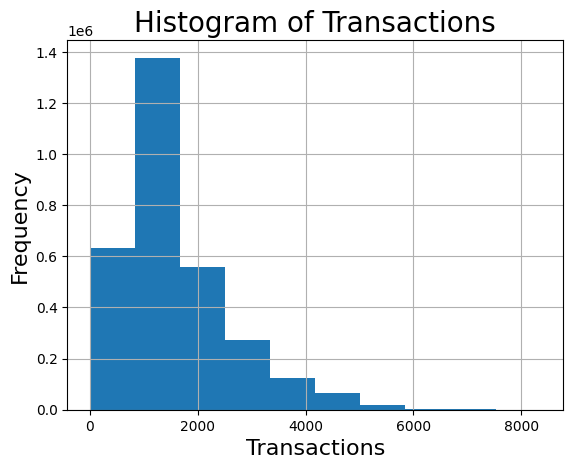

In [63]:
# Create a histogram of the 'transactions' column
train_data.transactions.hist()

# Add labels to the x-axis, y-axis, and title
plt.xlabel('Transactions', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Histogram of Transactions', fontsize=20)

# Show the plot
plt.show()

The histogram indicates that the majority of transactions cluster within a specific range, typically between 800 to 1800, indicating a central trend. However, the presence of outliers suggests the need for additional investigation to understand the reasons behind these extreme values. Additionally, there's a gradual decrease in the frequency of transactions, indicating a consistent transaction pattern over time.

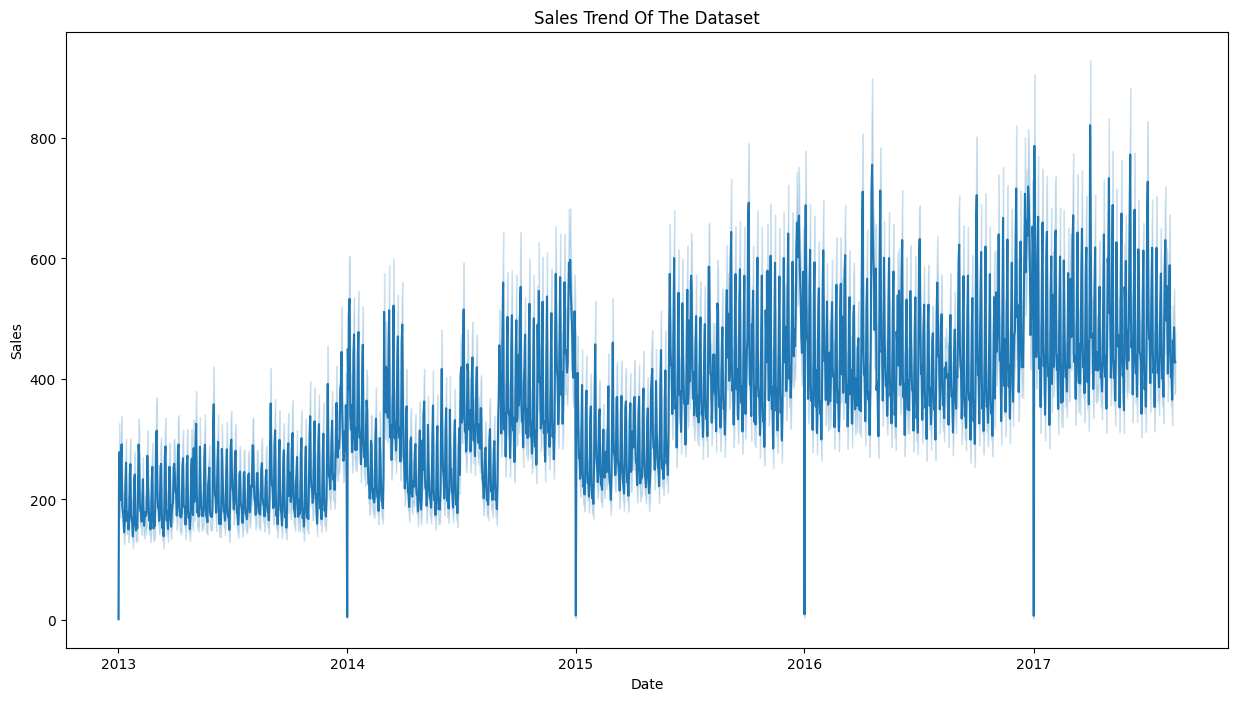

In [64]:
# Visualize the sales trend of the dataset

plt.figure(figsize=(15,8))
sns.lineplot(x='date', y='sales', data=train_data)
plt.title('Sales Trend Of The Dataset')
plt.xlabel('Date')
plt.ylabel('Sales')


plt.show()

The retail store's sales have been trending increasing over the years, as evidenced by the sales graph above. Additionally, it demonstrates that sales increase from year-beginning to year-end. Every year, there are no sales on the first day of the year, which is probably because all retail store employees have their regular holiday vacation on that day.


In [65]:
# Generate summary statistics for numerical columns in train_data DataFrame

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
store_nbr,3054348.0,27.500000,15.585787,1.000000,14.000000,27.500000,41.000000,54.000000
sales,3054348.0,359.020892,1107.285897,0.000000,0.000000,11.000000,196.011000,124717.000000
onpromotion,3054348.0,2.617480,12.254939,0.000000,0.000000,0.000000,0.000000,741.000000
month,3054348.0,6.222870,3.374251,1.000000,3.000000,6.000000,9.000000,12.000000
year,3054348.0,2014.842474,1.345607,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000
transactions,3054348.0,1558.655862,1036.467605,0.000000,931.000000,1332.000000,1980.000000,8359.000000
oil_price,3054348.0,67.789300,25.702576,26.190001,46.279999,53.189999,95.800003,110.620003


<Axes: >

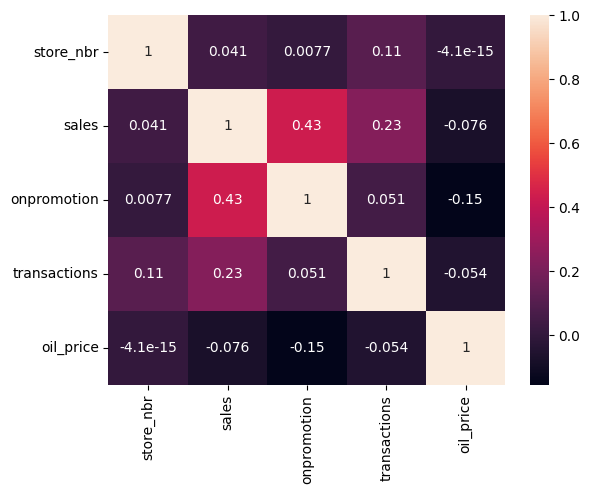

In [66]:
# Create a DataFrame of train_data with numerical columns only
train_data_num = train_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix of the numerical columns
corr_matrix = train_data_num.corr()

# Visualizing the correlation matrix with a heatmap
sns.heatmap(corr_matrix, annot=True)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


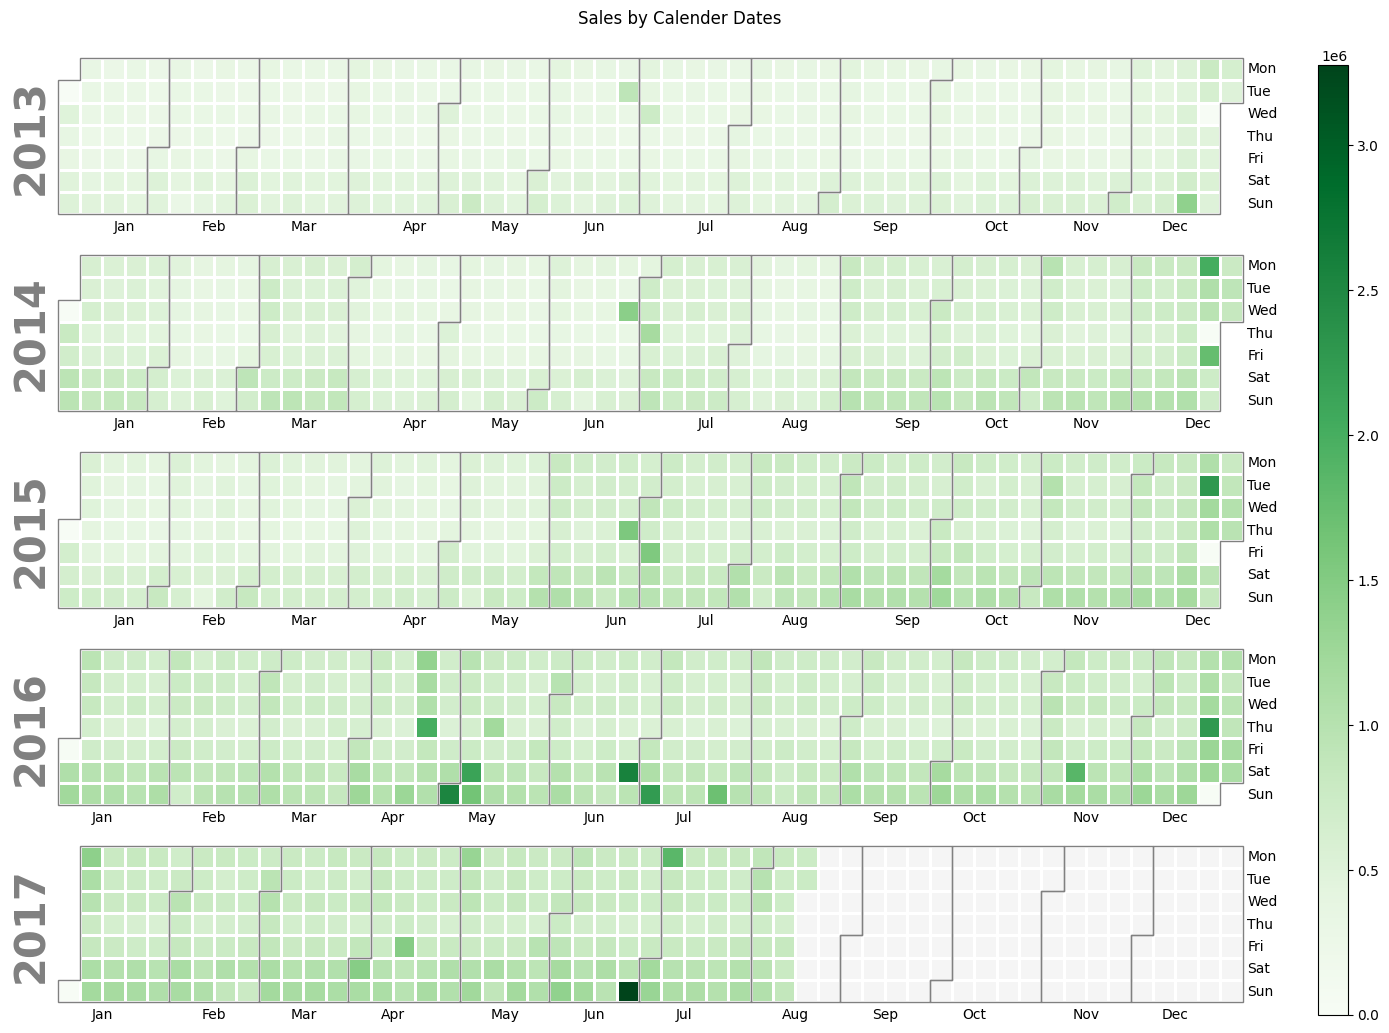

In [67]:
# visualize sales distribution on calenderplot
import calplot
calplot.calplot(train_data["sales"],how=sum, cmap="Greens",figsize=(15,10),suptitle="Sales by Calender Dates")
plt.show()

### Stationarity test

We made the decision to resample the complete dataset for the stationary test because to our restricted computational resources.


In [68]:
# Resample and calculate the mean only on the sales column
df_downsampled = train_data[["sales"]].resample("W").mean()

# check if there are Null values and handle them
df_downsampled.fillna(0,inplace=True)
df_downsampled

,sales
date,
2013-01-06,206.843478
2013-01-13,190.285220
2013-01-20,189.835452
2013-01-27,182.152050
2013-02-03,198.564267
...,...
2017-07-23,460.504663
2017-07-30,474.732392
2017-08-06,513.884368


In [69]:

#Test for stationarity using the ADF test
adf_result = adfuller(df_downsampled['sales'])

#Print the test results
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'Critical Values: {adf_result[4]}')

# Extract ADF statistic
adf_statistic = adf_result[0]

# Perform hypothesis testing
alpha = 0.05  # Significance level
if adf_statistic <= alpha:
    print("Reject the null hypothesis. Series is stationary.")
else:
    print("Fail to reject the null hypothesis. Series is non-stationary.")

ADF Statistic: -1.5853796429294291
p-value: 0.4909335238630899
Critical Values: {'1%': -3.458854867412691, '5%': -2.8740800599399323, '10%': -2.573453223097503}
Reject the null hypothesis. Series is stationary.


Based on the result provided, the ADF Statistic is -1.585, and the p-value is 0.491. The critical values at 1%, 5%, and 10% are -3.459, -2.874, and -2.573, respectively. Since the absolute value of the ADF statistic (-1.585) is greater than the critical values, and the p-value (0.491) is greater than the significance level (0.05), we fail to reject the null hypothesis. Therefore, the conclusion is that the series is non-stationary.
In summary, the result suggests that there is insufficient evidence to conclude that the time series is stationary based on the ADF test at the 5% significance level.

#### Visualizing Stationarity Using Rolling Statistics

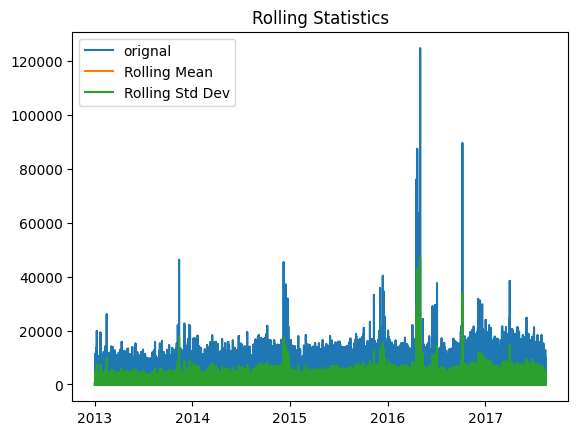

In [70]:
# Rolling Mean and Standard Deviation
rolling_mean = train_data["sales"].rolling(window=7).mean()
rolling_std = train_data["sales"].rolling(window=7).std()

# Plot Rolling Statistics
plt.plot(train_data["sales"],label="orignal")
plt.plot(rolling_mean,label="Rolling Mean")
plt.plot(rolling_std,label="Rolling Std Dev")
plt.legend(loc="best")
plt.title("Rolling Statistics")
plt.show()

### Test For AutoCorrelation

In order to comprehend the temporal connections within a time series data, the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) are crucial tools in time series analysis. The association between the feature values of sales and their dependence on their lag values will be visually understood through the use of the ACF and PACF. To verify the findings, the Ljung-Box test for autocorrelation will be used statistically.

1. Autocorrelation Function (ACF):

> The ACF measures the correlation between a time series and its lagged values at various time lags. Each point on the ACF plot represents the correlation between the time series and itself at different lags. Here's how to interpret it:


2. Partial Autocorrelation Function (PACF):

> Conversely, the PACF eliminates the impact of shorter lags and examines the direct link between a time series and its lagged values. This is how you understand it:

In time series modelling, the ACF aids in determining seasonality and long-term dependencies, whereas the PACF aids in determining the arrangement of the autoregressive and moving average components. When combined, they offer insightful information on the composition and possible modelling strategies for a time series dataset.



#### Plot of Partial Autocorrelation Function (PACF) and Autocorrelation Function (ACF)

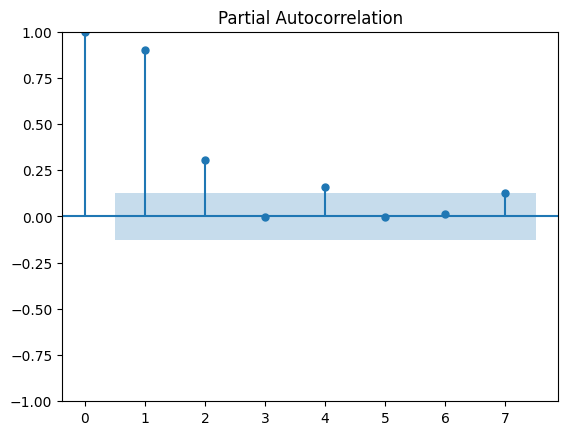

In [71]:

plot_pacf(df_downsampled["sales"], lags=7)
plt.show()


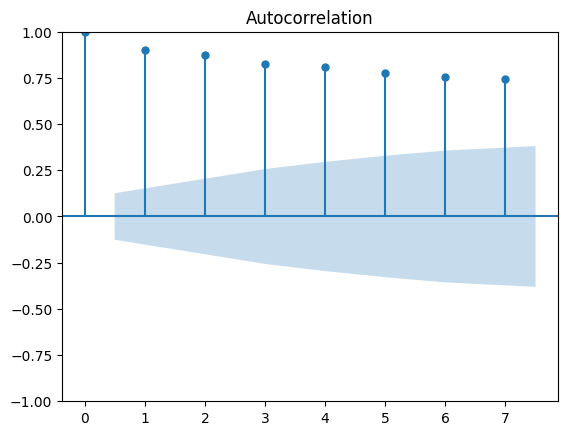

In [72]:



plot_acf(df_downsampled["sales"], lags=7)
plt.show()


#### STATISTICAL TEST USING LJUNG-BOX

A statistical test called the Ljung-Box test is used to determine whether autocorrelation exists in a time series at various delays. It is frequently used to evaluate whether a time series model's residuals, or mistakes, are independent, which is a necessary presumption for many time series models.

The test yields two columns: the p-value column, which has the p-value corresponding to each test statistic, and the Ljung-Box test statistic, which is a measure of the autocorrelation in the residuals at various lags.


In [75]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(result.resid, lags=[7], boxpierce=True)

# Print the results
print(lb_test)


   lb_stat  lb_pvalue  bp_stat  bp_pvalue
7      NaN        NaN      NaN        NaN


## ANALYTICAL QUESTIONS

#### Is the train dataset complete (has all the required dates)?

In [15]:
train_df = train
# Convert the date column to datetime format
train_df['date'] = pd.to_datetime(train_df['date'])

# Identify the expected range of dates (replace with the actual start and end dates)
start_date = train_df['date'].min()
end_date = train_df['date'].max()
expected_dates = pd.date_range(start=start_date, end=end_date)

# Get the unique dates present in the dataset
unique_dates = train_df['date'].unique()

# Check if all the expected dates are present in the dataset
missing_dates = expected_dates[~expected_dates.isin(unique_dates)]

if len(missing_dates) == 0:
    print("The train dataset is complete. It contains all the required dates.")
else:
    print("The train dataset is incomplete. The following dates are missing:")
    print(missing_dates)

The train dataset is incomplete. The following dates are missing:
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


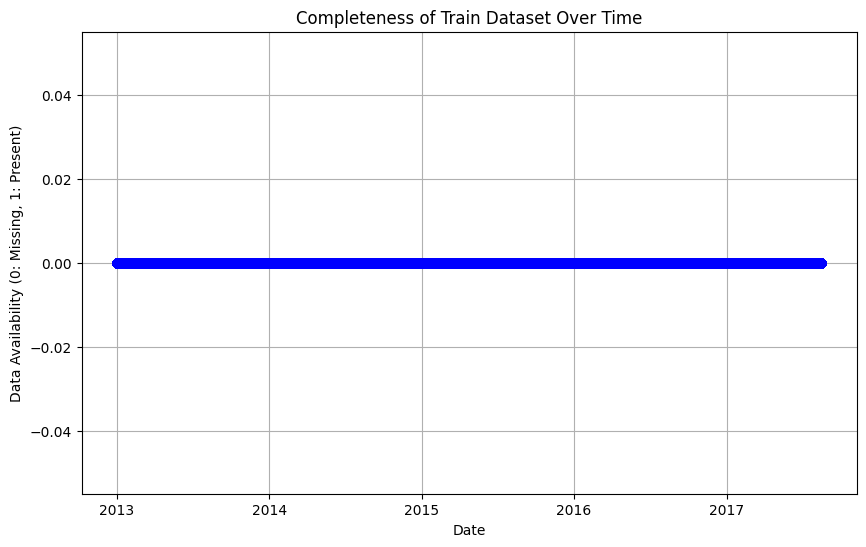

In [16]:
# Create a DataFrame with a single column 'date' containing all unique dates in the dataset
all_dates = pd.DataFrame({'date': pd.date_range(start=train_df['date'].min(), end=train_df['date'].max())})

# Merge the 'all_dates' DataFrame with the train dataset to identify missing dates
missing_dates = pd.merge(all_dates, train_df, on='date', how='left')
missing_dates['missing'] = missing_dates['date'].isnull()

# Plot the completeness of the dataset over time
plt.figure(figsize=(10, 6))
plt.plot(missing_dates['date'], missing_dates['missing'], marker='o', linestyle='', color='blue')
plt.title('Completeness of Train Dataset Over Time')
plt.xlabel('Date')
plt.ylabel('Data Availability (0: Missing, 1: Present)')
plt.grid(True)
plt.show()


#### Which dates have the lowest and highest sales for each year (excluding days the store was closed)?

In [17]:
stores_df= stores

# Merge train_df with stores_df to get information about store closures
merged_df = pd.merge(train_df, stores_df, on="store_nbr", how="left")

# Filter out the closed days
open_days_df = merged_df[merged_df["type"] != "D"]

# Convert date column to datetime format
open_days_df["date"] = pd.to_datetime(open_days_df["date"])

# Group by year and find the dates with the lowest and highest sales for each year
sales_by_year = open_days_df.groupby(open_days_df["date"].dt.year)
for year, group in sales_by_year:
    min_sales_date = group.loc[group["sales"].idxmin()]["date"]
    max_sales_date = group.loc[group["sales"].idxmax()]["date"]
    print(f"For the year {year}:")
    print(f"Lowest sales date: {min_sales_date.strftime('%Y-%m-%d')}")
    print(f"Highest sales date: {max_sales_date.strftime('%Y-%m-%d')}")

For the year 2013:
Lowest sales date: 2013-01-01
Highest sales date: 2013-11-12
For the year 2014:
Lowest sales date: 2014-01-01
Highest sales date: 2014-12-08
For the year 2015:
Lowest sales date: 2015-01-01
Highest sales date: 2015-12-14
For the year 2016:
Lowest sales date: 2016-01-01
Highest sales date: 2016-10-07
For the year 2017:
Lowest sales date: 2017-01-01
Highest sales date: 2017-04-02


#### Compare the sales for each month across the years and determine which month of which year had the highest sales.

In [18]:
# Extract month and year
train_df["month"] = train_df["date"].dt.month
train_df["year"] = train_df["date"].dt.year

# Group by year and month, calculate total sales
monthly_sales = train_df.groupby(["year", "month"])["sales"].sum()

# Find the month and year with the highest sales
highest_sales_month = monthly_sales.idxmax()
highest_sales_value = monthly_sales.max()

print("Month and Year with the Highest Sales:")
print(f"Month: {highest_sales_month[1]}, Year: {highest_sales_month[0]}, Sales: {highest_sales_value}")


Month and Year with the Highest Sales:
Month: 12, Year: 2016, Sales: 29640287.5793851


####  Did the earthquake impact sales?

In [19]:

# Define the timeframe around the earthquake
earthquake_date = pd.to_datetime("2016-04-16")
before_earthquake = train_df[train_df["date"] < earthquake_date]
after_earthquake = train_df[train_df["date"] > earthquake_date]

# Calculate average sales for each period
avg_sales_before = before_earthquake["sales"].mean()
avg_sales_after = after_earthquake["sales"].mean()

# Compare average sales before and after the earthquake
if avg_sales_after > avg_sales_before:
    print("The earthquake had a positive impact on sales.")
elif avg_sales_after < avg_sales_before:
    print("The earthquake had a negative impact on sales.")
else:
    print("The earthquake had no significant impact on sales.")


The earthquake had a positive impact on sales.


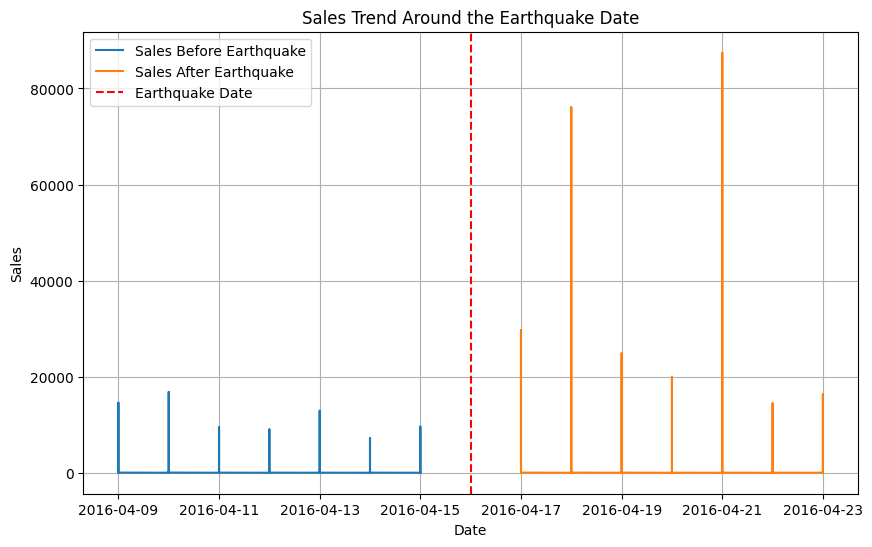

In [20]:
# Define the timeframe around the earthquake
earthquake_date = pd.to_datetime("2016-04-16")
start_date = earthquake_date - pd.Timedelta(days=7)
end_date = earthquake_date + pd.Timedelta(days=7)

# Filter data for a week before and after the earthquake
sales_before = train_df[(train_df["date"] >= start_date) & (train_df["date"] < earthquake_date)]
sales_after = train_df[(train_df["date"] > earthquake_date) & (train_df["date"] <= end_date)]

# Plot sales data
plt.figure(figsize=(10, 6))
plt.plot(sales_before["date"], sales_before["sales"], label="Sales Before Earthquake")
plt.plot(sales_after["date"], sales_after["sales"], label="Sales After Earthquake")
plt.axvline(x=earthquake_date, color='red', linestyle='--', label='Earthquake Date')
plt.title("Sales Trend Around the Earthquake Date")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


#### Are certain stores or groups of stores selling more products? (Cluster, city, state, type)

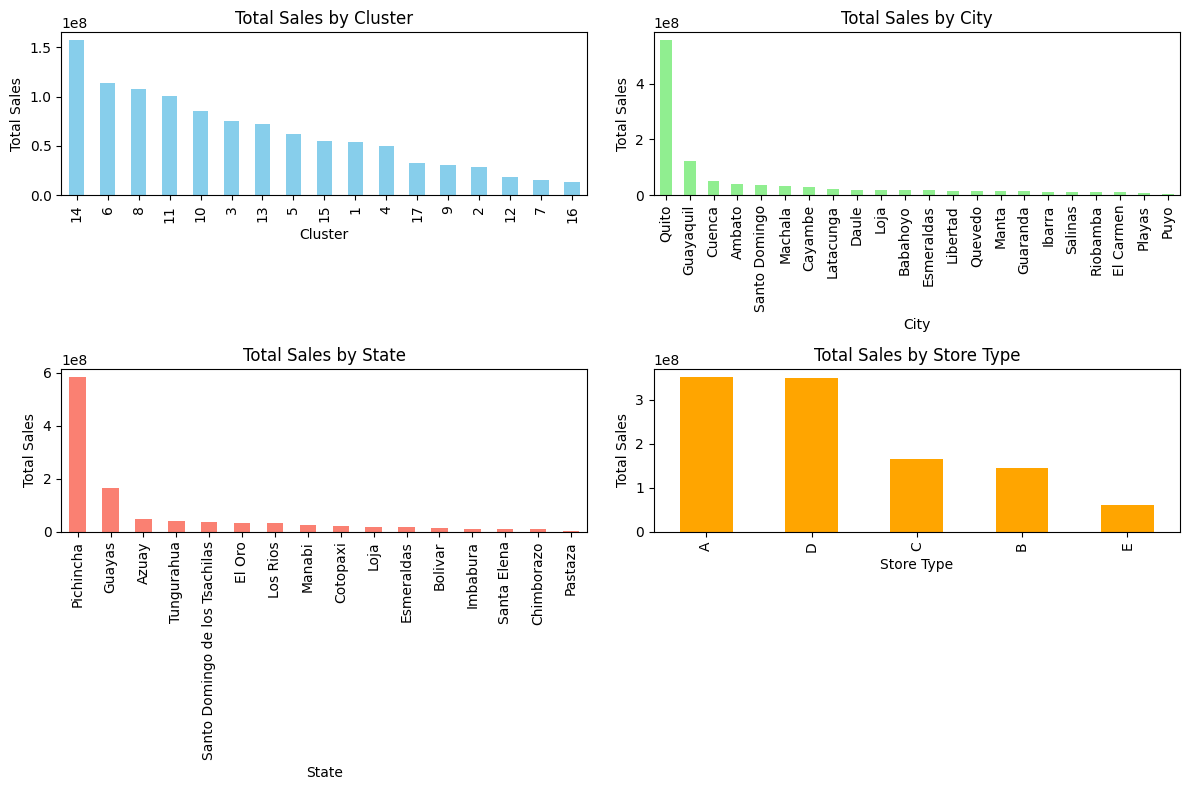

In [21]:
sales_df= train

# Merge sales data with store metadata
merged_df = pd.merge(sales_df, stores_df, on="store_nbr", how="left")

# Group by cluster and calculate total sales
sales_by_cluster = merged_df.groupby("cluster")["sales"].sum().sort_values(ascending=False)

# Group by city and calculate total sales
sales_by_city = merged_df.groupby("city")["sales"].sum().sort_values(ascending=False)

# Group by state and calculate total sales
sales_by_state = merged_df.groupby("state")["sales"].sum().sort_values(ascending=False)

# Group by store type and calculate total sales
sales_by_type = merged_df.groupby("type")["sales"].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sales_by_cluster.plot(kind="bar", color="skyblue")
plt.title("Total Sales by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Sales")

plt.subplot(2, 2, 2)
sales_by_city.plot(kind="bar", color="lightgreen")
plt.title("Total Sales by City")
plt.xlabel("City")
plt.ylabel("Total Sales")

plt.subplot(2, 2, 3)
sales_by_state.plot(kind="bar", color="salmon")
plt.title("Total Sales by State")
plt.xlabel("State")
plt.ylabel("Total Sales")

plt.subplot(2, 2, 4)
sales_by_type.plot(kind="bar", color="orange")
plt.title("Total Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.show()


+ `Total Sales by cluster` : The graph indicates a varied distribution of sales across different clusters. This suggests that certain clusters are performing significantly better than others in terms of sales. Cluster 14 stands out as the top performer with the highest total sales. 


+ `Total Sales by City` : The graph shows a comparison of total sales across different cities. Guayaquil stands out with significantly higher sales compared to other cities like Quito, Cuenca, and Santo Domingo. This suggests that Guayaquil is a major market or has favorable conditions for sales.


+ `Total Sales by Store Type`: The  graph compares total sales by store type, with types A and D having notably higher sales than types B and E. This indicates that certain store types are more successful or popular among customers.


+ `Total Sales By State` : Pichincha State  has the highest total sales, with a bar reaching up to 6 on the y-axis scaled by 1e8, indicating a very strong sales performance. Guayas & Azuay states follow Pichincha with noticeable sales figures but are significantly lower than Pichincha’s sales. The remaining states have minimal to no visible bars, suggesting very low sales in comparison to Pichincha, Guayas, and Azuay.




#### Are sales affected by promotions, oil prices and holidays?

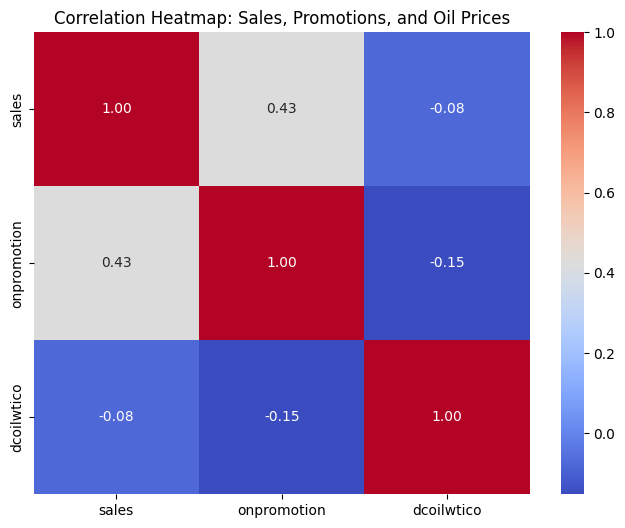

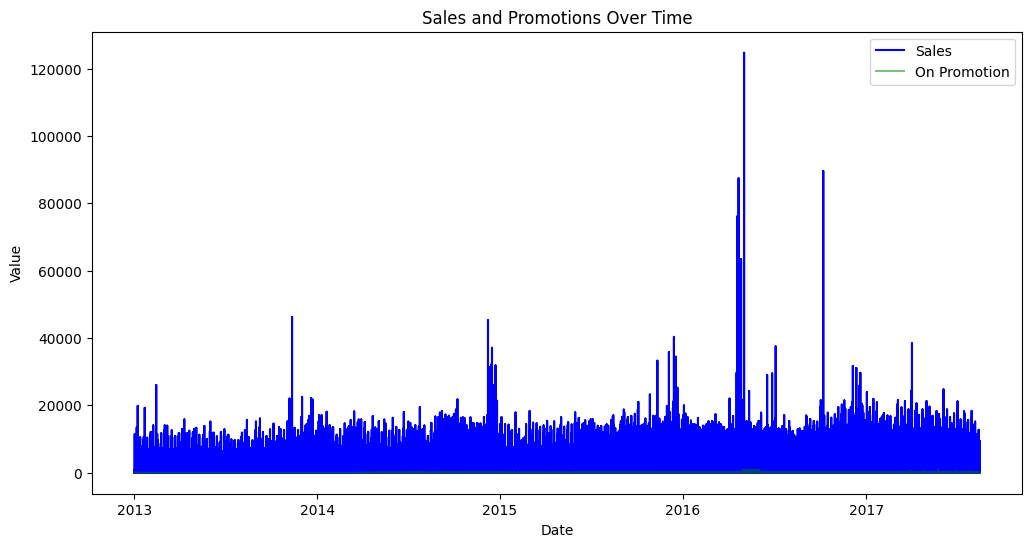

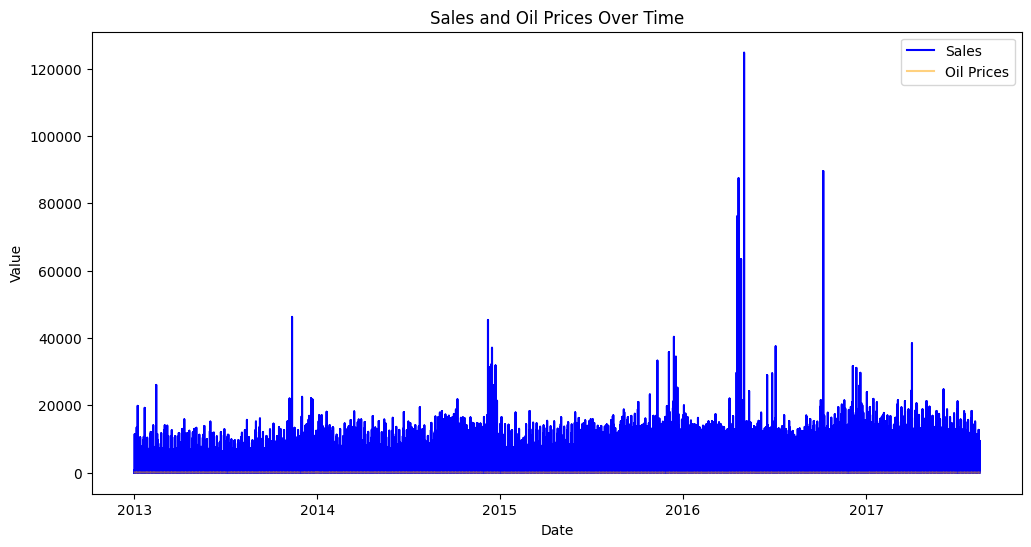

In [22]:
oil_df= oil
holidays_df= holidays_events

# Convert "date" column to datetime format in all dataframes
train_df["date"] = pd.to_datetime(train_df["date"])
oil_df["date"] = pd.to_datetime(oil_df["date"])
holidays_df["date"] = pd.to_datetime(holidays_df["date"])

# Merge train_df with oil_df and holidays_df
merged_df = pd.merge(train_df, oil_df, on="date", how="left")
merged_df = pd.merge(merged_df, holidays_df, on="date", how="left")

# Calculate correlation coefficients
correlation_matrix = merged_df[["sales", "onpromotion", "dcoilwtico"]].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Sales, Promotions, and Oil Prices")
plt.show()

# Plot sales and promotions over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df["date"], merged_df["sales"], label="Sales", color="blue")
plt.plot(merged_df["date"], merged_df["onpromotion"], label="On Promotion", color="green", alpha=0.5)
plt.title("Sales and Promotions Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# Plot sales and oil prices over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df["date"], merged_df["sales"], label="Sales", color="blue")
plt.plot(merged_df["date"], merged_df["dcoilwtico"], label="Oil Prices", color="orange", alpha=0.5)
plt.title("Sales and Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


Average Sales During Holidays: 389.6921227795084
Average Sales During Non-Holidays: 352.15918056230004


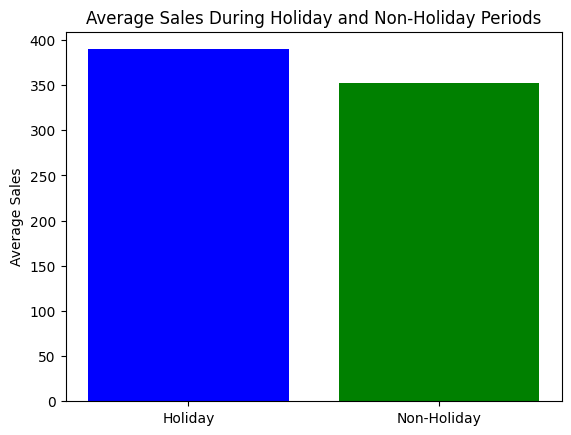

In [20]:

# Convert date column to datetime format
sales_df["date"] = pd.to_datetime(sales_df["date"])
holidays_df["date"] = pd.to_datetime(holidays_df["date"])

# Identify holiday periods
holidays = holidays_df["date"].tolist()

# Define a function to label holiday periods
def is_holiday(date):
    return date in holidays

# Apply the function to create a new column indicating whether each day is a holiday
sales_df["is_holiday"] = sales_df["date"].apply(is_holiday)

# Calculate average sales during holiday and non-holiday periods
average_sales_holiday = sales_df[sales_df["is_holiday"]]["sales"].mean()
average_sales_non_holiday = sales_df[~sales_df["is_holiday"]]["sales"].mean()

# Print the average sales during holiday and non-holiday periods
print("Average Sales During Holidays:", average_sales_holiday)
print("Average Sales During Non-Holidays:", average_sales_non_holiday)

# Visualize average sales during holiday and non-holiday periods
plt.bar(["Holiday", "Non-Holiday"], [average_sales_holiday, average_sales_non_holiday], color=['blue', 'green'])
plt.title("Average Sales During Holiday and Non-Holiday Periods")
plt.ylabel("Average Sales")
plt.show()


#### `Correlation Heatmap :`

> + `Sales Correlation`: Sales have a strong positive correlation with themselves, which is  expected, and a moderate positive correlation of 0.43 with promotions, suggesting that as promotions increase, sales tend to increase as well.


> + `Promotions Correlation`: Promotions also have a strong positive correlation with themselves  and a moderate negative correlation of -0.15 with oil prices, indicating that when oil prices increase, the number of promotions tends to decrease slightly.


> + `Oil Prices Correlation`: Oil prices (dcoilwtico) have a very weak negative correlation with sales (-0.08) and promotions (-0.15), suggesting that changes in oil prices have a negligible  direct effect on sales and promotions.


> +  The color intensity on the heatmap reflects the strength of these correlations, with red  indicating a positive correlation, blue indicating a negative correlation, and the intensity  of the color indicating the strength of the relationship.


#### `Sales And Promotions Over Time`

> + The first bar graph shows the relationship between **sales** and **promotions** over a period from **2013 to 2017**. :


> + `Sales Trends`: The blue bars represent sales over time, with varying heights indicating fluctuations in sales across different years.


> + `Promotion Impact`: The green line represents periods when products were on promotion. There’s a clear alignment between the promotional periods and spikes in sales, particularly noticeable in late 2015 and early 2016.


> + `Promotional Strategy Effectiveness`: The graph suggests that promotions have a positive impact on sales, as higher sales volumes coincide with promotional activities.



#### `Sales And Oil Prices Over Time`

> + The Sales And Oil Prices Over Time Graph shows the trends in sales and oil prices over time, from 2013 to 2017. 


> + `Sales Trends`: The blue bars represent sales, which appear relatively stable with some fluctuations over the years.


> + `Oil Prices Trends`: The black bars represent oil prices, which show more volatility, with significant spikes noted around late 2015 and early 2016.


> + `Correlation`: While the graph shows both sales and oil prices, it does not explicitly indicate a correlation. However, the spikes in oil prices do not seem to correspond with any significant changes in sales, suggesting that sales were not strongly affected by oil price changes during this period.


#### `Average Sales During Holidays and Non Holidays`

> + The bar graph indicates a comparison between average sales during holiday periods and non-holiday periods. 

> + `Holiday Sales`: The blue bar, representing sales during holidays, reaches up to 350 on the y-axis. This suggests that average sales are significantly higher during holiday periods.


> + `Non-Holiday Sales`: The green bar, representing non-holiday sales, reaches up to approximately 300. This indicates that average sales are lower during non-holiday periods compared to holidays.


> + `The graph clearly shows that holidays have a positive impact on sales, with a noticeable increase in average sales during these times. 


#### Analysis From Dates and their extractable features

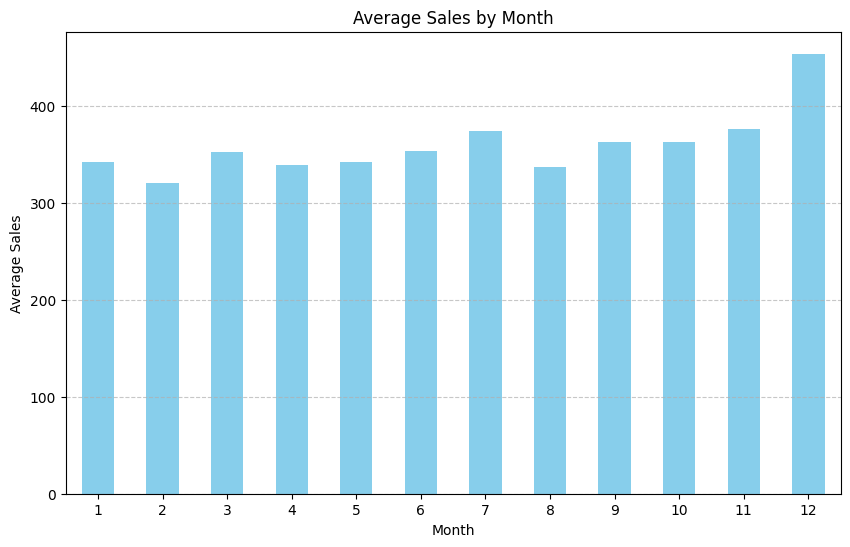

In [21]:
# Convert date column to datetime format
sales_df["date"] = pd.to_datetime(sales_df["date"])

# Extract month from date
sales_df["month"] = sales_df["date"].dt.month

# Group by month and calculate average sales
average_sales_by_month = sales_df.groupby("month")["sales"].mean()

# Plot average sales by month
plt.figure(figsize=(10, 6))
average_sales_by_month.plot(kind="bar", color="skyblue")
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


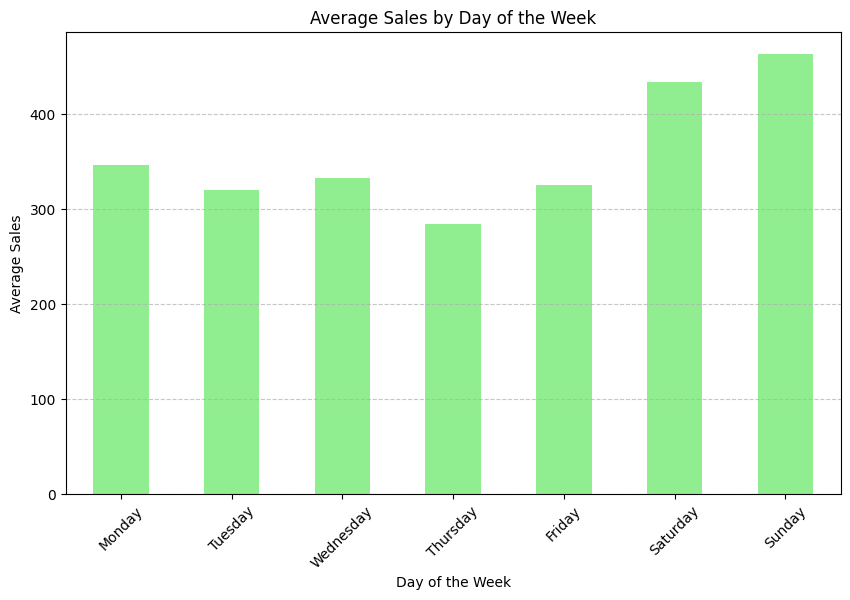

In [22]:
# Extract day of the week (0 = Monday, 6 = Sunday)
sales_df["day_of_week"] = sales_df["date"].dt.dayofweek

# Define day names for better visualization
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Group by day of the week and calculate average sales
average_sales_by_day = sales_df.groupby("day_of_week")["sales"].mean()

# Plot average sales by day of the week
plt.figure(figsize=(10, 6))
average_sales_by_day.plot(kind="bar", color="lightgreen")
plt.title("Average Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Sales")
plt.xticks(range(7), day_names, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


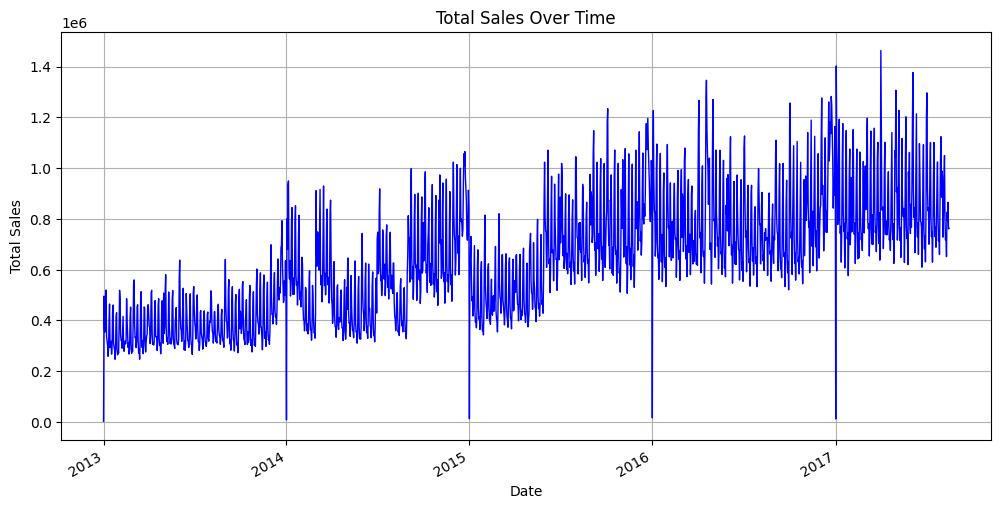

In [23]:
# Group by date and calculate total sales
total_sales_by_date = sales_df.groupby("date")["sales"].sum()

# Plot total sales over time
plt.figure(figsize=(12, 6))
total_sales_by_date.plot(color="blue", linewidth=1)
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


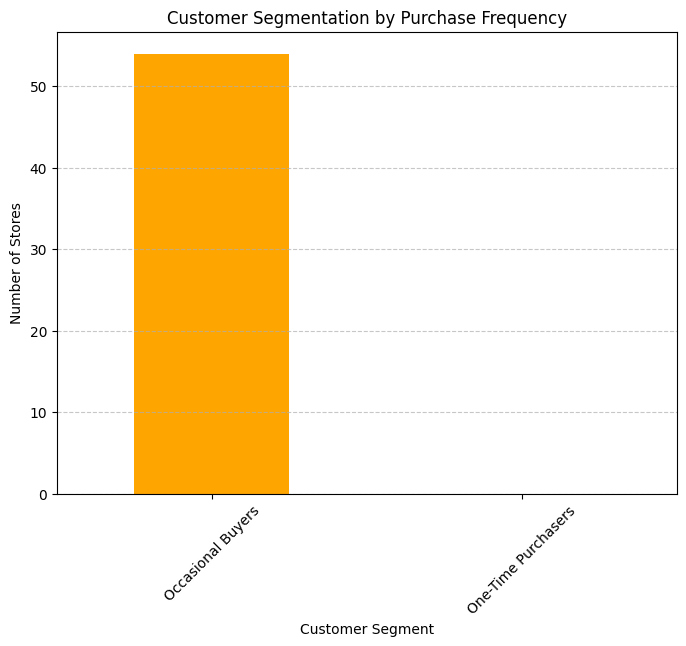

In [24]:
# Extract year and month from date
sales_df["year_month"] = sales_df["date"].dt.to_period('M')

# Group by store and count the number of purchases per month
customer_purchase_freq = sales_df.groupby(["year_month", "store_nbr"]).size().reset_index(name="purchase_count")

# Calculate the average purchase frequency per month per store
average_purchase_freq = customer_purchase_freq.groupby("store_nbr")["purchase_count"].mean()

# Define customer segments based on purchase frequency
segments = ["One-Time Purchasers", "Occasional Buyers", "Loyal Customers"]

# Define thresholds for segmenting customers
thresholds = [1, 2, float('inf')]

# Segment stores based on purchase frequency
customer_segments = pd.cut(average_purchase_freq, bins=thresholds, labels=segments[:-1])

# Plot customer segments
plt.figure(figsize=(8, 6))
customer_segments.value_counts().plot(kind="bar", color="orange")
plt.title("Customer Segmentation by Purchase Frequency")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Stores")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Average Sales By Month
> + The sales figures are consistent across months 1 through 11, with each month having similar average sales.
> + There is a <span style = "color:green">significant increase in sales in the 12th month</span>, indicating a possible seasonal effect or a  special event that boosts sales during that period.


#### Average Sales By Day
> + Monday and Sunday have the highest average sales, with figures close to 400.
Thursday shows the lowest average sales, slightly above 200.
> + The other days, Tuesday, Wednesday, Friday, and Saturday, have similar sales figures, ranging from 300 to just under 400.
> + This suggests that the business experiences a peak in sales at the <span style = "color:green"> start and end of the week</span>, with a noticeable dip in <span style = "color:red"> midweek thus Thursday</span>.


#### Total Sales Over Time

> + The graph shows <span style = "color:blue">fluctuations</span> in sales, with the heights of the lines varying significantly, indicating that sales volume was inconsistent.
> + There is <span style = "color:blue">no clear trend of sales increasing or decreasing steadily over time</span>, suggesting that the business may have experienced various external or internal factors affecting sales.
> + overall, there is a steady increase in <span style = "color:green"> sales by year</span>

<span style = "color:green">customer loyalty and long-term success</span>, with a noticeable dip in <span style = "color:red">mid week, thius Thursday</span>


#### Customer Segmentation by Purchase Frequency.

> + There is a significant number of Occasional Buyers, with the bar reaching up to 40 on the y-axis.
> + There are zero One-Time Purchasers, as indicated by the absence of a bar in that category.
> + This suggests that once customers make a purchase, <span style = "color:green">they are likely to return</span>, indicating a <span style = "color:green">positive customer retention rate</span> for the business. 
> + The lack of one-time purchasers could mean that the business is successful in encouraging repeat business, which is a key aspect of <span style = "color:green">customer loyalty and long-term success</span>.

#### Which product family and stores did the promotions affect.

#### Top !0 Product families that were affected by promotions
> 1. `Grocery`: has the highest sales during promotions however, the impact of the promotion is not that much
> 2. `Beverages`

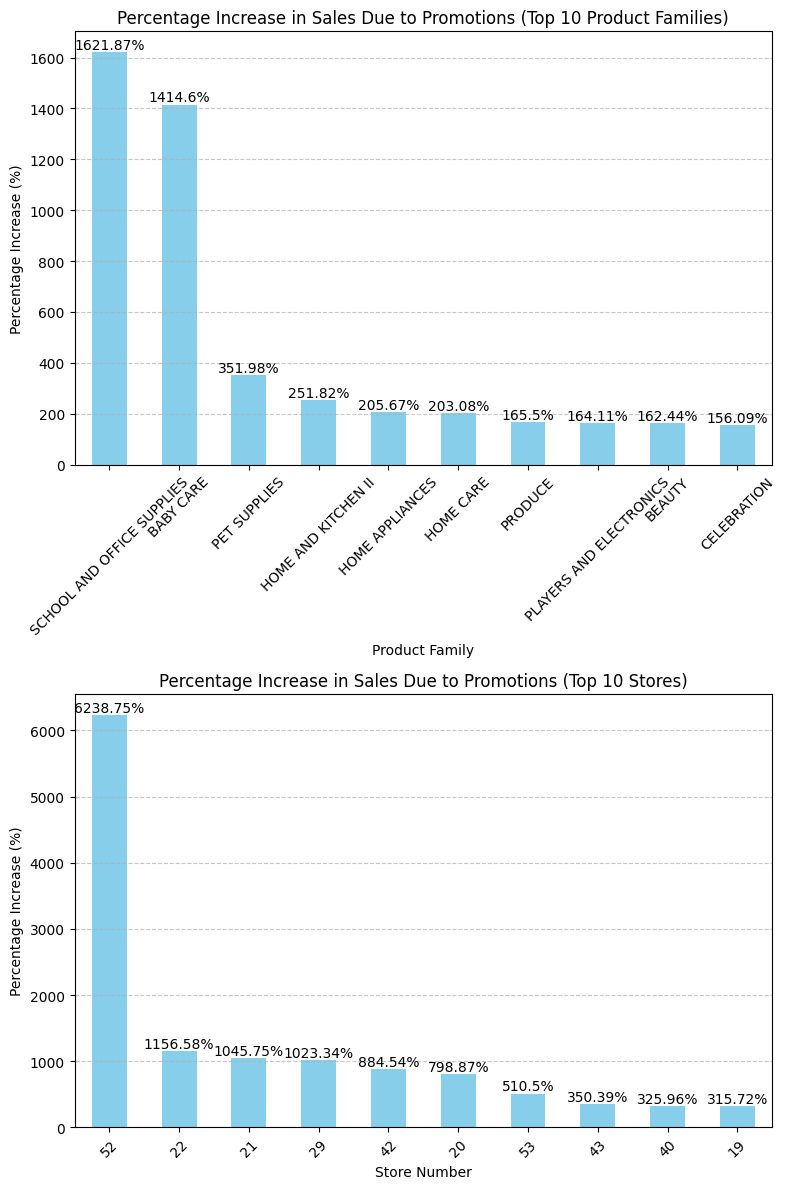

In [33]:
# Merge sales data with store metadata
merged_df = pd.merge(sales_df, stores_df, on="store_nbr", how="left")

# Group by product family and calculate total sales during promotions and non-promotions
promoted_sales_by_family = merged_df[merged_df["onpromotion"] == 1].groupby("family")["sales"].mean().sort_values(ascending=False)
non_promoted_sales_by_family = merged_df[merged_df["onpromotion"] == 0].groupby("family")["sales"].mean().sort_values(ascending=False)

# Group by store and calculate total sales during promotions and non-promotions
promoted_sales_by_store = merged_df[merged_df["onpromotion"] == 1].groupby("store_nbr")["sales"].mean().sort_values(ascending=False)
non_promoted_sales_by_store = merged_df[merged_df["onpromotion"] == 0].groupby("store_nbr")["sales"].mean().sort_values(ascending=False)


# Calculate the percentage increase in sales due to promotions
percentage_increase_by_family = ((promoted_sales_by_family - non_promoted_sales_by_family) / non_promoted_sales_by_family) * 100
percentage_increase_by_store = ((promoted_sales_by_store - non_promoted_sales_by_store) / non_promoted_sales_by_store) * 100

# Sort the data by percentage increase
percentage_increase_by_family = percentage_increase_by_family.sort_values(ascending=False)
percentage_increase_by_store = percentage_increase_by_store.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(8, 12))

# Plotting percentage increase in sales due to promotions by family
plt.subplot(2, 1, 1)
percentage_increase_by_family.head(10).plot(kind="bar", color="skyblue")
plt.title("Percentage Increase in Sales Due to Promotions (Top 10 Product Families)")
plt.xlabel("Product Family")
plt.ylabel("Percentage Increase (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels to the bars
for i, v in enumerate(percentage_increase_by_family.head(10)):
    plt.text(i, v + 1, f"{round(v, 2)}%", ha='center', va='bottom')

# Plotting percentage increase in sales due to promotions by store
plt.subplot(2, 1, 2)
percentage_increase_by_store.head(10).plot(kind="bar", color="skyblue")
plt.title("Percentage Increase in Sales Due to Promotions (Top 10 Stores)")
plt.xlabel("Store Number")
plt.ylabel("Percentage Increase (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels to the bars
for i, v in enumerate(percentage_increase_by_store.head(10)):
    plt.text(i, v + 1, f"{round(v, 2)}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Impact of Promotions on Sales of Product Family

> 1. `Schools and office supplies` : this has a percentage sale increase of <span style = "color:green">1621.87%</span>

> 2. `Baby Care` : has a sales increase of <span style = "color:green">1414.6%</span>

> 3. `Pet Supplies` : has a much lower impact as it has about <span style = "color:green">352%%</span> sale increase

> 4. `Home And Kitchen` : has an increase of about <span style = "color:green">252%</span>

> 5. `Home Appliances` and `Home Care`: have between <span style = "color:green">203% and 207%</span>

> 6. `Produce`, `players and electronics`, `beauty` and `celebration` : range between  <span style = "color:green">150% and 170%</span> sale imcrease during promotions


#### Impact of Promotions on Sales By Stores

> 1. `Shop 52` : this has a percentage sale increase of <span style = "color:green">over 6000%</span>

> 2. `shop 22, 21 and 29` : have a sales increase of <span style = "color:green">ranging between 1000% and 1200%</span>

> 3. `shops 42 and 20` : have a  an impact as it has about <span style = "color:green">700% to 900%</span> sale increase

> 4. `Shop 53` : has an increase of about <span style = "color:green">511%</span>

> 5. `Shops 43,40 and 19`: have between <span style = "color:green">300% and 350%</span>

<span style = "color:green">1414.6%</span>

#### Effects Of Pay Day on Store Sales

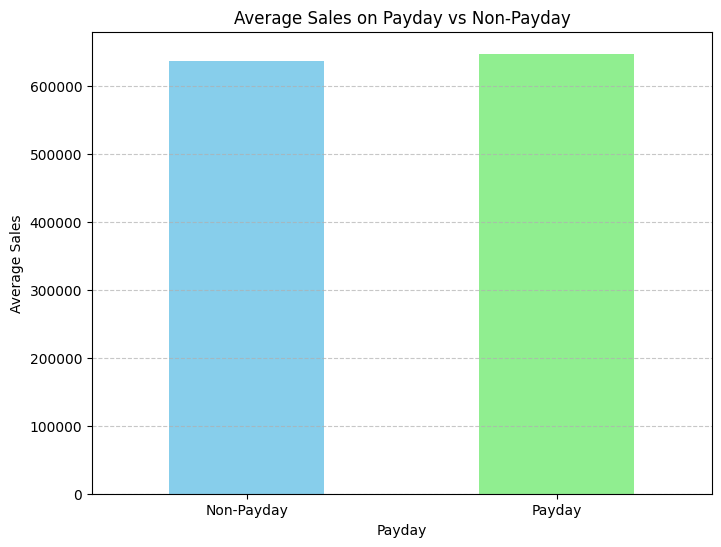

In [26]:
# Grouping sales data by date
sales_by_date = sales_df.groupby('date')['sales'].sum().reset_index()

# Extracting day of the month from the date
sales_by_date['day'] = pd.to_datetime(sales_by_date['date']).dt.day

# Defining paydays as the 15th and last days of the month
paydays = [15, max(sales_by_date['day'])]

# Grouping sales data by payday/non-payday
sales_by_payday = sales_by_date.copy()
sales_by_payday['is_payday'] = sales_by_payday['day'].isin(paydays)

# Calculating average sales on payday and non-payday days
average_sales_by_payday = sales_by_payday.groupby('is_payday')['sales'].mean()

# Plotting
plt.figure(figsize=(8, 6))
average_sales_by_payday.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Sales on Payday vs Non-Payday')
plt.xlabel('Payday')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['Non-Payday', 'Payday'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


There is no signifance in sales during payday and non pay days

### Hypothesis Testing

In [27]:
# Sales data on payday and non-payday days
sales_payday = sales_by_payday[sales_by_payday['is_payday'] == True]['sales']
sales_non_payday = sales_by_payday[sales_by_payday['is_payday'] == False]['sales']

# Sample statistics
mean_payday = np.mean(sales_payday)
mean_non_payday = np.mean(sales_non_payday)
var_payday = np.var(sales_payday, ddof=1)  # Using Bessel's correction for sample variance
var_non_payday = np.var(sales_non_payday, ddof=1)
n_payday = len(sales_payday)
n_non_payday = len(sales_non_payday)

# Calculate the t-statistic
t_statistic = (mean_payday - mean_non_payday) / np.sqrt((var_payday / n_payday) + (var_non_payday / n_non_payday))

# Degrees of freedom
degrees_of_freedom = n_payday + n_non_payday - 2

# Two-tailed critical t-value at α = 0.05
alpha = 0.05
critical_t = t.ppf(1 - alpha / 2, degrees_of_freedom)

print("t-statistic:", t_statistic)
print("Critical t-value:", critical_t)


t-statistic: 0.4424065109693579
Critical t-value: 1.9613753699116634


In [28]:
# Compare the t-statistic to the critical t-value
if np.abs(t_statistic) > critical_t:
    print("Reject the null hypothesis. There is a significant difference in average store sales between payday and non-payday days.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average store sales between payday and non-payday days.")


Fail to reject the null hypothesis. There is no significant difference in average store sales between payday and non-payday days.


## Preparing Data

#### create a lag_sales column to be the difference

In [77]:
#   Differencing 
train_data["sales_diff"] =train_data["sales"] - train_data["sales"].shift(1)
train_data.head()

,store_nbr,family,sales,onpromotion,month,year,transactions,holiday_type,locale,locale_name,description,transferred,oil_price,city,state,store_type,cluster,holiday_status,sales_diff
date,,,,,,,,,,,,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday,NaN
2013-01-01,1,BABY CARE,0.0,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday,0.0
2013-01-01,1,BEAUTY,0.0,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday,0.0
2013-01-01,1,BEVERAGES,0.0,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday,0.0
2013-01-01,1,BOOKS,0.0,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday,0.0


In [78]:
# check for missing values
train_data.isna().sum()

store_nbr         0
family            0
sales             0
onpromotion       0
month             0
year              0
transactions      0
holiday_type      0
locale            0
locale_name       0
description       0
transferred       0
oil_price         0
city              0
state             0
store_type        0
cluster           0
holiday_status    0
sales_diff        1
dtype: int64

#### Differentiation

In [79]:
# group by sales date
diff_df = train_data.groupby(train_data.index)["sales_diff"].sum().reset_index()
diff_df.set_index("date",inplace=True)
diff_df

,sales_diff
date,
2013-01-01,0.000000
2013-01-02,29.214000
2013-01-03,-4.214000
2013-01-04,-14.000000
2013-01-05,17.361000
...,...
2017-08-11,9.481000
2017-08-12,-6.971999
2017-08-13,3.140999


#### Check for Stationarity After Differencing

<Axes: xlabel='date'>

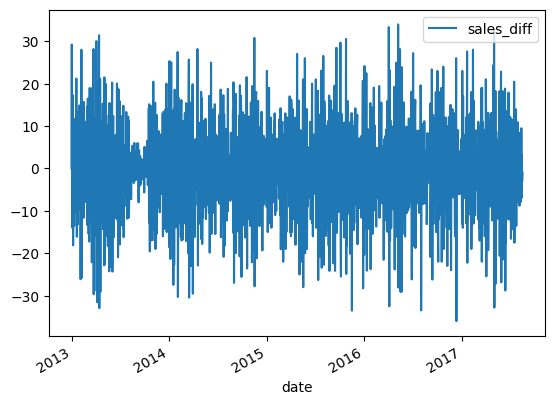

In [80]:
diff_df.plot()

Stationarity following difference is illustrated in the updated line plot of the sale_diff column. Let's use the AD Fuller test to confirm once more.

In [81]:
# Use Adfuller to check for stationarity
adftest = adfuller(diff_df["sales_diff"])
print(f"ADF statistics: {adftest[0]}")
print(f"p-value: {adftest[1]}")
print(f"Critical values: {adftest[4]}")

if adftest[1] > 0.05:
    print("The series is non-stationary")
else:
    print("The series is stationary")


ADF statistics: -13.90596835941113
p-value: 5.62229464889369e-26
Critical values: {'1%': -3.434288317816291, '5%': -2.863279543282764, '10%': -2.5676960908695463}
The series is stationary


After differencing, the AD-Fuller test further demonstrates the stationability of our dataset with a test statistic of -13.8064 and a p-value infinitesima value much below the 0.05 significance criterion, indicating that our dataset is now suitable for modeling.


#### Rolling Statistics

In [82]:
# Add rolling mean with a 7-day window
train_data["moving_avg_sales"] = train_data["sales"].rolling(window=30).mean()
train_data


,store_nbr,family,sales,onpromotion,month,year,transactions,holiday_type,locale,locale_name,description,transferred,oil_price,city,state,store_type,cluster,holiday_status,sales_diff,moving_avg_sales
date,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.000,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday,NaN,NaN
2013-01-01,1,BABY CARE,0.000,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday,0.000,NaN
2013-01-01,1,BEAUTY,0.000,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday,0.000,NaN
2013-01-01,1,BEVERAGES,0.000,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday,0.000,NaN
2013-01-01,1,BOOKS,0.000,0,1,2013,0.0,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,Quito,Pichincha,D,13,Holiday,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,9,POULTRY,438.133,0,8,2017,2155.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.570000,Quito,Pichincha,B,6,Holiday,432.133,531.617500
2017-08-15,9,PREPARED FOODS,154.553,1,8,2017,2155.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.570000,Quito,Pichincha,B,6,Holiday,-283.580,535.991600
2017-08-15,9,PRODUCE,2419.729,148,8,2017,2155.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.570000,Quito,Pichincha,B,6,Holiday,2265.176,616.149233


In [83]:
# group by sales date
Total_sales = train_data.groupby(train_data.index)["moving_avg_sales"].sum().reset_index()
Total_sales.set_index("date",inplace=True)
Total_sales

,moving_avg_sales
date,
2013-01-01,2511.618999
2013-01-02,491767.536977
2013-01-03,362872.904457
2013-01-04,355148.556059
2013-01-05,475988.208329
...,...
2017-08-11,825387.786986
2017-08-12,792514.218853
2017-08-13,865181.016197


<Axes: xlabel='date'>

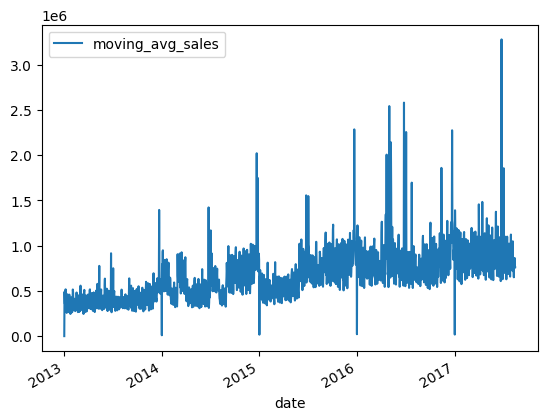

In [84]:
Total_sales.plot()

In [85]:
# check for Null Values
train_data.isna().sum()

store_nbr            0
family               0
sales                0
onpromotion          0
month                0
year                 0
transactions         0
holiday_type         0
locale               0
locale_name          0
description          0
transferred          0
oil_price            0
city                 0
state                0
store_type           0
cluster              0
holiday_status       0
sales_diff           1
moving_avg_sales    29
dtype: int64

#### Sample Data for the Machine Learning Models' 
Our current system cannot handle the complete dataset for training, thus we will sample and work with only 40% of the over 3 million data points in the training set due to restricted computational resources.


In [86]:
# Defining the function to sample the Data
def sample_data(df: pd.DataFrame, size: float):
   
    # calculate the number of rows to sample
    sample_size = int(size * len(df))
    # randomly sample the data
    sample_df = df.sample(n=sample_size, random_state=42)
    return sample_df

In [88]:
# call the the sample_data function to randomly sample 40% of data for training
sampled_df = sample_data(train_data,0.2)
# view the first five rows
sampled_df.head(5)

,store_nbr,family,sales,onpromotion,month,year,transactions,holiday_type,locale,locale_name,description,transferred,oil_price,city,state,store_type,cluster,holiday_status,sales_diff,moving_avg_sales
date,,,,,,,,,,,,,,,,,,,,
2014-01-07,23,DAIRY,471.0,0,1,2014,1135.0,No holiday,No holiday,No holiday,No holiday,No holiday,93.309998,Ambato,Tungurahua,D,9,No holiday,-330.0,97.956333
2014-12-05,1,BEAUTY,1.0,0,12,2014,2028.0,Additional,Local,Quito,Fundacion de Quito-1,False,65.889999,Quito,Pichincha,D,13,Holiday,1.0,377.039300
2014-07-06,45,HOME APPLIANCES,0.0,0,7,2014,4626.0,No holiday,No holiday,No holiday,No holiday,No holiday,104.190002,Quito,Pichincha,A,11,No holiday,-38.0,1912.859367
2014-05-02,20,LAWN AND GARDEN,0.0,0,5,2014,0.0,No holiday,No holiday,No holiday,No holiday,No holiday,100.089996,Quito,Pichincha,B,6,No holiday,0.0,59.787470
2014-02-25,25,HOME AND KITCHEN II,0.0,0,2,2014,705.0,No holiday,No holiday,No holiday,No holiday,No holiday,102.199997,Salinas,Santa Elena,D,1,No holiday,0.0,151.755500


In [89]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 610869 entries, 2014-01-07 to 2014-12-16
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   store_nbr         610869 non-null  int64   
 1   family            610869 non-null  object  
 2   sales             610869 non-null  float64 
 3   onpromotion       610869 non-null  int64   
 4   month             610869 non-null  int32   
 5   year              610869 non-null  int32   
 6   transactions      610869 non-null  float64 
 7   holiday_type      610869 non-null  object  
 8   locale            610869 non-null  object  
 9   locale_name       610869 non-null  object  
 10  description       610869 non-null  object  
 11  transferred       610869 non-null  object  
 12  oil_price         610869 non-null  float64 
 13  city              610869 non-null  category
 14  state             610869 non-null  category
 15  store_type        610869 non-null  

In [92]:
copy_sample=sampled_df.copy()

In [117]:
sampled_df=copy_sample.copy()

In [119]:
sampled_df['day'] = sampled_df.index.day

# Display the first few rows to confirm the addition
sampled_df.head()

,store_nbr,family,sales,onpromotion,month,year,transactions,holiday_type,locale,locale_name,description,transferred,oil_price,city,state,store_type,cluster,holiday_status,sales_diff,moving_avg_sales,day
date,,,,,,,,,,,,,,,,,,,,,
2014-01-07,23,DAIRY,471.0,0,1,2014,1135.0,No holiday,No holiday,No holiday,No holiday,No holiday,93.309998,Ambato,Tungurahua,D,9,No holiday,-330.0,97.956333,7
2014-12-05,1,BEAUTY,1.0,0,12,2014,2028.0,Additional,Local,Quito,Fundacion de Quito-1,False,65.889999,Quito,Pichincha,D,13,Holiday,1.0,377.039300,5
2014-07-06,45,HOME APPLIANCES,0.0,0,7,2014,4626.0,No holiday,No holiday,No holiday,No holiday,No holiday,104.190002,Quito,Pichincha,A,11,No holiday,-38.0,1912.859367,6
2014-05-02,20,LAWN AND GARDEN,0.0,0,5,2014,0.0,No holiday,No holiday,No holiday,No holiday,No holiday,100.089996,Quito,Pichincha,B,6,No holiday,0.0,59.787470,2
2014-02-25,25,HOME AND KITCHEN II,0.0,0,2,2014,705.0,No holiday,No holiday,No holiday,No holiday,No holiday,102.199997,Salinas,Santa Elena,D,1,No holiday,0.0,151.755500,25


#### Feature Selection for Modeling

In [127]:
relevant_features = ["onpromotion","family","sales","day","store_nbr", "year"]
training_data = sampled_df[relevant_features]
training_data. head()

,onpromotion,family,sales,day,store_nbr,year
date,,,,,,
2014-01-07,0,DAIRY,471.0,7,23,2014
2014-12-05,0,BEAUTY,1.0,5,1,2014
2014-07-06,0,HOME APPLIANCES,0.0,6,45,2014
2014-05-02,0,LAWN AND GARDEN,0.0,2,20,2014
2014-02-25,0,HOME AND KITCHEN II,0.0,25,25,2014


##### Data Splitting

The dataset will be splitted to training and validation sets using the time-based split. This will be done based on the years.

In [128]:
# List the years in the dataset

training_data['year'].unique()

array([2014, 2013, 2015, 2016, 2017])

In [129]:
# Establish the years for the training set and validation set
train_years = [2013, 2014, 2015, 2016]
val_year = [2017]

# Obtain the training set and validation set
train_set = training_data.loc[(training_data['year'].isin(train_years) & training_data['year'].isin(train_years))]
val_set = training_data.loc[(training_data['year'].isin(val_year) & training_data['year'].isin(val_year))]

# Print the shape of the training set and validation set
train_set.shape, val_set.shape

((528622, 6), (82247, 6))

In [130]:
# Check the datatypes of the columns of the training set

train_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 528622 entries, 2014-01-07 to 2014-12-16
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   onpromotion  528622 non-null  int64  
 1   family       528622 non-null  object 
 2   sales        528622 non-null  float64
 3   day          528622 non-null  int32  
 4   store_nbr    528622 non-null  int64  
 5   year         528622 non-null  int32  
dtypes: float64(1), int32(2), int64(2), object(1)
memory usage: 24.2+ MB


In [131]:
# Extract the original index column for later use
train_index = train_set.index
val_index = val_set.index

# Obtain the categorical columns to encode and numerical columns to scale (I dropped the 'Year' column here)
cat_columns_to_encode = ['family']
num_columns_to_scale = ['store_nbr', 'onpromotion', 'sales']

# Create seperate DataFrames for categorical columns and numerical columns of training set
train_set_cat_df = train_set[cat_columns_to_encode]
train_set_num_df = train_set[num_columns_to_scale]

# Create seperate DataFrames for categorical columns and numerical columns of validation set
val_set_cat_df = val_set[cat_columns_to_encode]
val_set_num_df = val_set[num_columns_to_scale]

##### Feature Encoding

In [134]:
# Create an encoder object using OneHotEncoder.
# Set sparse=False for dense output and drop='first' to avoid multicollinearity

encoder = OneHotEncoder(drop='first')




In [136]:
# Use OneHotEncoder to encode the categorical columns of the training set
train_set_cat_encoded = encoder.transform(train_set_cat_df)

# Convert the encoded data to a dense array
train_set_cat_encoded_dense = train_set_cat_encoded.toarray()

# Convert the dense array to a list
train_set_cat_encoded_list = train_set_cat_encoded_dense.tolist()

# Create a DataFrame from the encoded data
train_set_cat_encoded_df = pd.DataFrame(train_set_cat_encoded_list, columns=encoder.get_feature_names_out(), index=train_index)

# View the encoded columns of the training set
train_set_cat_encoded_df.head()


,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-12-05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-07-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-05-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-02-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
# Use OneHotEncoder to encode the categorical columns of the training set
encoder.fit(train_set_cat_df)

# Transform both the training and validation sets using the fitted encoder
train_set_cat_encoded = encoder.transform(train_set_cat_df)
val_set_cat_encoded = encoder.transform(val_set_cat_df)

# Convert the encoded data to dense arrays
train_set_cat_encoded_dense = train_set_cat_encoded.toarray()
val_set_cat_encoded_dense = val_set_cat_encoded.toarray()

# Create DataFrames from the encoded data
train_set_cat_encoded_df = pd.DataFrame(train_set_cat_encoded_dense, columns=encoder.get_feature_names_out(), index=train_index)
val_set_cat_encoded_df = pd.DataFrame(val_set_cat_encoded_dense, columns=encoder.get_feature_names_out(), index=val_index)

# View the encoded columns of the validation set
val_set_cat_encoded_df.head()


,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-02-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2017-02-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-06-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2017-04-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


##### Feature Scaling

MinMaxScaler will be used for feature scaling as it is suitable for time series data because it preserves the relative differences between data points and maintains the temporal information.

In [139]:
# Create a scaler object using MinMaxScaler

scaler = MinMaxScaler()

In [140]:
# Use MinMaxScaler to scale the numerical columns of the training set
scaler.fit(train_set_num_df)
train_set_num_scaled = scaler.transform(train_set_num_df).tolist()
train_set_num_scaled_df = pd.DataFrame(train_set_num_scaled, columns=scaler.get_feature_names_out(), index=train_index)

# View the scaled columns of the training set
train_set_num_scaled_df.head()

,store_nbr,onpromotion,sales
date,,,
2014-01-07,0.415094,0.0,0.005387
2014-12-05,0.000000,0.0,0.000011
2014-07-06,0.830189,0.0,0.000000
2014-05-02,0.358491,0.0,0.000000
2014-02-25,0.452830,0.0,0.000000


In [143]:
# Use MinMaxScaler to scale the numerical columns of the validation set
scaler.fit(val_set_num_df)
val_set_num_scaled = scaler.transform(val_set_num_df).tolist()
val_set_num_scaled_df = pd.DataFrame(val_set_num_scaled, columns=scaler.get_feature_names_out(), index=val_index)

# View the scaled columns of the validation set
val_set_num_scaled_df.head()

,store_nbr,onpromotion,sales
date,,,
2017-02-11,0.188679,0.000000,0.000000
2017-02-15,0.245283,0.008565,0.015391
2017-06-17,0.075472,0.000000,0.002104
2017-04-24,0.283019,0.000000,0.000041
2017-06-30,0.754717,0.000000,0.001659


In [144]:
# Combine the encoded and scaled DataFrames to get the final training and validation sets
train_final = pd.concat([train_set_cat_encoded_df, train_set_num_scaled_df], axis=1)
val_final = pd.concat([val_set_cat_encoded_df, val_set_num_scaled_df], axis=1)

# Print the shape of the final training and validation sets
train_final.shape, val_final.shape


((528622, 35), (82247, 35))

In [145]:
# Display the first five rows of the final training set

train_final.head()

,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,store_nbr,onpromotion,sales
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.415094,0.0,0.005387
2014-12-05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000011
2014-07-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.830189,0.0,0.000000
2014-05-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.358491,0.0,0.000000
2014-02-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.452830,0.0,0.000000


In [146]:
# Display the first five rows of the final training set

train_final.tail()

,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,store_nbr,onpromotion,sales
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.433962,0.0,0.002184
2016-05-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.396226,0.0,0.000011
2013-09-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094340,0.0,0.001830
2015-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.396226,0.0,0.000000
2014-12-16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.415094,0.0,0.000023


In [147]:
# Display the first five rows of the final validation set

val_final.head()

,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,store_nbr,onpromotion,sales
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-02-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.188679,0.000000,0.000000
2017-02-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.245283,0.008565,0.015391
2017-06-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.075472,0.000000,0.002104
2017-04-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283019,0.000000,0.000041
2017-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.754717,0.000000,0.001659


In [148]:
# Separate the features (X) and the target variable (y) for training and validation sets
X_train = train_final.drop('sales', axis=1)
y_train = train_final['sales']
X_val = val_final.drop('sales', axis=1)
y_val = val_final['sales']

# Replace the elements of y_val with their absolute value in order to eliminate the presence of negative values in the y_val array
y_val = np.abs(y_val)
y_val = y_val.reset_index(drop=True)
y_val = y_val[y_val >= 0]

# Verify the lengths of the features(X) and the target variable (y) of the final training and validation sets
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))
print("Length of X_test:", len(X_val))
print("Length of y_test:", len(y_val))

Length of X_train: 528622
Length of y_train: 528622
Length of X_test: 82247
Length of y_test: 82247


#### Modelling

The following models will be trained and evaluated:

##### 1. Linear Regression

**Linear Regression** is a basic and widely used statistical technique for predictive modeling. It assumes a linear relationship between the independent variables (features) and the dependent variable (target). The goal is to fit a line (or hyperplane in higher dimensions) that minimizes the sum of the squared differences between the observed values and the values predicted by the line.

**Key Points**:
- Simple and interpretable.
- Assumes linear relationships.
- Sensitive to outliers.

##### 2. XGBoost

**XGBoost (Extreme Gradient Boosting)** is a powerful and efficient implementation of the gradient boosting framework. It builds an ensemble of decision trees sequentially, where each tree corrects the errors of the previous ones. XGBoost is known for its performance and speed, making it a popular choice in machine learning competitions.

**Key Points**:
- High performance and accuracy.
- Handles missing data well.
- Requires careful tuning of hyperparameters.
- Can handle large datasets efficiently.

##### 3. CatBoost

**CatBoost (Categorical Boosting)** is another gradient boosting algorithm that is specifically designed to handle categorical features effectively without requiring extensive preprocessing like one-hot encoding. It is known for its fast training speed, ease of use, and superior handling of categorical data.

**Key Points**:
- Excellent for datasets with categorical features.
- Reduces the need for extensive preprocessing.
- Robust to overfitting.

##### 4. AutoRegressive (AutoReg)

**AutoRegressive (AutoReg)** models are used in time series analysis. An AutoRegressive model predicts future values based on past values of the same variable. It assumes that the current value of the series is a linear function of its previous values plus a noise term.

**Key Points**:
- Simple and interpretable.
- Effective for time series with autocorrelation.
- Assumes stationarity (constant mean and variance over time).

##### 5. AutoRegressive Integrated Moving Average (ARIMA)

**ARIMA (AutoRegressive Integrated Moving Average)** is a more sophisticated time series forecasting model that combines autoregression (AR), differencing (I for Integration), and moving average (MA). It accounts for autocorrelation, trends, and seasonality in the data.

**Key Points**:
- Can model various types of time series data.
- Requires parameter tuning for AR, I, and MA components.
- Assumes stationarity after differencing.

##### 6. Seasonal AutoRegressive Integrated Moving Average (SARIMA)

**SARIMA (Seasonal ARIMA)** extends the ARIMA model to handle seasonality explicitly. It includes seasonal autoregressive (SAR), seasonal differencing (SI), and seasonal moving average (SMA) components in addition to the non-seasonal parts.

**Key Points**:
- Specifically designed for seasonal time series data.
- More complex but captures seasonal patterns effectively.
- Requires careful identification of seasonal parameters.

### Summary

Each model has its strengths and appropriate use cases:

- **Linear Regression**: Simple relationships, easy interpretation.
- **XGBoost**: High performance, handles large datasets, requires tuning.
- **CatBoost**: Best for categorical data, fast and robust.
- **AutoReg**: Simple time series data with autocorrelation.
- **ARIMA**: Non-seasonal time series data with trends and autocorrelation.
- **SARIMA**: Seasonal time series data with trends and autocorrelation.


The following evaluation metrics will be used to evaluate the performance of the models.

- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Squared Logarithmic Error (MSLE)
- Root Mean Squared Logarithmic Error (RMSLE)

The primary evaluation metric for selecting the best performing model is the Root Mean Squared Logarithmic Error (RMSLE).

In [149]:
# Create an empty DataFrame to store the results of the evaluation metrics of each model

results = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'MSLE', 'RMSLE'])
results

,Model,MAE,MSE,RMSE,MSLE,RMSLE


### Model 1: Linear Regression`

In [153]:

# Initialize the model
linear_regression_model = LinearRegression()

# Fit the model
linear_regression_model.fit(X_train, y_train)

# Make predictions on the final validation set
linear_regression_pred = linear_regression_model.predict(X_val)

# Calculate the evaluation metrics
linear_regression_mae = mean_absolute_error(y_val, linear_regression_pred)
linear_regression_mse = mean_squared_error(y_val, linear_regression_pred)
linear_regression_rmse = np.sqrt(linear_regression_mse)

# Define custom function to handle the negative predictions in order to calculate msle
def linear_regression_msle_with_non_negative_targets(y_val, linear_regression_pred):
    # Add a constant value to all target values to ensure they are non-negative
    y_val_non_negative = y_val + np.abs(np.min(y_val)) + 1
    
    # Add the same constant value to the predicted values
    linear_regression_pred_non_negative = linear_regression_pred + np.abs(np.min(y_val)) + 1
    
    # Calculate the MSLE using the transformed targets
    linear_regression_msle = mean_squared_log_error(y_val_non_negative, linear_regression_pred_non_negative)
    return linear_regression_msle

# Calculate msle using the custom function, then calculate rmsle
linear_regression_msle = linear_regression_msle_with_non_negative_targets(y_val, linear_regression_pred)
linear_regression_rmsle = np.sqrt(linear_regression_msle)

# Create a dictionary for the evaluation metrics of Linear Regression model
linear_regression_evaluation_metrics = pd.DataFrame({'Model': ['Linear Regression'], 'MAE': [linear_regression_mae],
                                                     'MSE': [linear_regression_mse], 'RMSE': [linear_regression_rmse],
                                                     'MSLE': [linear_regression_msle], 'RMSLE': [linear_regression_rmsle]})

# Add the linear regression evaluation metrics to the results DataFrame, then print the results DataFrame
results = pd.concat([results, linear_regression_evaluation_metrics], ignore_index=True)
results

,Model,MAE,MSE,RMSE,MSLE,RMSLE
0,Linear Regression,0.015044,0.002498,0.049981,0.000521,0.02283


### Model 2: XGBoost

In [155]:

# Initialize the model
xgboost_model = XGBRegressor()

# Fit the model
xgboost_model.fit(X_train, y_train)

# Make predictions on the final validation set
xgboost_pred = xgboost_model.predict(X_val)

# Calculate the evaluation metrics
xgboost_mae = mean_absolute_error(y_val, xgboost_pred)
xgboost_mse = mean_squared_error(y_val, xgboost_pred)
xgboost_rmse = np.sqrt(xgboost_mse)

# Define custom function to handle the negative predictions in order to calculate msle
def xgboost_msle_with_non_negative_targets(y_val, xgboost_pred):
    # Add a constant value to all target values to ensure they are non-negative
    y_val_non_negative = y_val + np.abs(np.min(y_val)) + 1
    
    # Add the same constant value to the predicted values
    xgboost_pred_non_negative = xgboost_pred + np.abs(np.min(y_val)) + 1
    
    # Calculate the MSLE using the transformed targets
    xgboost_msle = mean_squared_log_error(y_val_non_negative, xgboost_pred_non_negative)
    return xgboost_msle

# Calculate msle using the custom function, then calculate rmsle
xgboost_msle = xgboost_msle_with_non_negative_targets(y_val, xgboost_pred)
xgboost_rmsle = np.sqrt(xgboost_msle)

# Create a dictionary for the evaluation metrics of xgboost model
xgboost_evaluation_metrics = pd.DataFrame({'Model': ['XGBoost'], 'MAE': [xgboost_mae], 'MSE': [xgboost_mse], 'RMSE': [xgboost_rmse],
                                           'MSLE': [xgboost_msle], 'RMSLE': [xgboost_rmsle]})

# Add the xgboost evaluation metrics to the results DataFrame, then print the results DataFrame
results = pd.concat([results, xgboost_evaluation_metrics], ignore_index=True)
results

,Model,MAE,MSE,RMSE,MSLE,RMSLE
0,Linear Regression,0.015044,0.002498,0.049981,0.000521,0.022830
1,XGBoost,0.014663,0.002045,0.045220,0.000424,0.020582


### Model 3: CatBoost

In [157]:
from catboost import CatBoostRegressor
# Initialize the model
catboost_model = CatBoostRegressor(verbose=False)

# Fit the model
catboost_model.fit(X_train, y_train)

# Make predictions on the final validation set
catboost_pred = catboost_model.predict(X_val)

# Calculate the evaluation metrics
catboost_mae = mean_absolute_error(y_val, catboost_pred)
catboost_mse = mean_squared_error(y_val, catboost_pred)
catboost_rmse = np.sqrt(catboost_mse)

# Define custom function to handle the negative predictions in order to calculate msle
def catboost_msle_with_non_negative_targets(y_val, catboost_pred):
    # Add a constant value to all target values to ensure they are non-negative
    y_val_non_negative = y_val + np.abs(np.min(y_val)) + 1
    
    # Add the same constant value to the predicted values
    catboost_pred_non_negative = catboost_pred + np.abs(np.min(y_val)) + 1
    
    # Calculate the MSLE using the transformed targets
    catboost_msle = mean_squared_log_error(y_val_non_negative, catboost_pred_non_negative)
    return catboost_msle

# Calculate msle using the custom function, then calculate rmsle
catboost_msle = catboost_msle_with_non_negative_targets(y_val, catboost_pred)
catboost_rmsle = np.sqrt(catboost_msle)

# Create a dictionary for the evaluation metrics of catboost model
catboost_evaluation_metrics = pd.DataFrame({'Model': ['CatBoost'], 'MAE': [catboost_mae], 'MSE': [catboost_mse], 'RMSE': [catboost_rmse],
                                           'MSLE': [catboost_msle], 'RMSLE': [catboost_rmsle]})

# Add the catboost evaluation metrics to the results DataFrame, then print the results DataFrame
results = pd.concat([results, catboost_evaluation_metrics], ignore_index=True)
results

,Model,MAE,MSE,RMSE,MSLE,RMSLE
0,Linear Regression,0.015044,0.002498,0.049981,0.000521,0.022830
1,XGBoost,0.014663,0.002045,0.045220,0.000424,0.020582
2,CatBoost,0.014628,0.002038,0.045144,0.000422,0.020541


### Model 4: AutoRegressive (AutoReg)

In [159]:
# Determine the best lag using Akaike Information Criterion (AIC)
max_lag = 10  # Define the maximum lag order to consider
best_aic = float('inf')  # Initialize best_aic to positive infinity
best_lag = 0  # Initialize best_lag to zero

for lag in range(1, max_lag + 1):
    aic_AR_model = AutoReg(y_train, lags=lag)
    aic_AR_model_fit = aic_AR_model.fit()
    aic = -2 * aic_AR_model_fit.llf + 2 * (lag + 1)  # Calculate AIC manually
    if aic < best_aic:
        best_aic = aic
        best_lag = lag

# Print the best lag
print(f'The best lag is: {best_lag}')

The best lag is: 6


In [160]:
# Initialize the model
AR_model = AutoReg(y_train, lags=best_lag)

# Fit the model
AR_model_fit = AR_model.fit()

# Make predictions
AR_start = len(y_train)
AR_end = len(y_train) + len(y_val) - 1
AR_pred = AR_model_fit.predict(start=AR_start, end=AR_end)

# Calculate evaluation metrics
AR_mae = mean_absolute_error(y_val, AR_pred)
AR_mse = mean_squared_error(y_val, AR_pred)
AR_rmse = np.sqrt(AR_mse)
AR_msle = mean_squared_log_error(y_val, AR_pred)
AR_rmsle = np.sqrt(AR_msle)

# Create a dictionary for the evaluation metrics of the AR model
AR_evaluation_metrics = pd.DataFrame({'Model': ['AutoReg'], 'MAE': [AR_mae], 'MSE': [AR_mse], 'RMSE': [AR_rmse], 'MSLE': [AR_msle], 'RMSLE': [AR_rmsle]})

# Add the AR evaluation metrics to the results DataFrame, then print the results DataFrame
results = pd.concat([results, AR_evaluation_metrics], ignore_index=True)
results

,Model,MAE,MSE,RMSE,MSLE,RMSLE
0,Linear Regression,0.015044,0.002498,0.049981,0.000521,0.022830
1,XGBoost,0.014663,0.002045,0.045220,0.000424,0.020582
2,CatBoost,0.014628,0.002038,0.045144,0.000422,0.020541
3,AutoReg,0.020267,0.003456,0.058787,0.002617,0.051155


### Model 5: AutoRegressive Integrated Moving Average (ARIMA)

In [162]:
from statsmodels.tsa.arima.model import ARIMA
# Define the (p, d, q) parameters for ARIMA
ARIMA_order = (2, 1, 1)

# Initialize the model
ARIMA_model = ARIMA(y_train, order=ARIMA_order)

# Fit the model
ARIMA_model_fit = ARIMA_model.fit()

# Make predictions
ARIMA_start = len(y_train)
ARIMA_end = len(y_train) + len(y_val) - 1
ARIMA_pred = ARIMA_model_fit.predict(start=ARIMA_start, end=ARIMA_end)

# Calculate evaluation metrics
ARIMA_mae = mean_absolute_error(y_val, ARIMA_pred)
ARIMA_mse = mean_squared_error(y_val, ARIMA_pred)
ARIMA_rmse = np.sqrt(ARIMA_mse)
ARIMA_msle = mean_squared_log_error(y_val, ARIMA_pred)
ARIMA_rmsle = np.sqrt(ARIMA_msle)

# Create a dictionary for the evaluation metrics of ARIMA model
ARIMA_evaluation_metrics = pd.DataFrame({'Model': ['ARIMA'], 'MAE': [ARIMA_mae], 'MSE': [ARIMA_mse], 'RMSE': [ARIMA_rmse], 'MSLE': [ARIMA_msle],
                                      'RMSLE': [ARIMA_rmsle]})

# Add the ARIMA evaluation metrics to the results DataFrame, then print the results DataFrame
results = pd.concat([results, ARIMA_evaluation_metrics], ignore_index=True)
results

,Model,MAE,MSE,RMSE,MSLE,RMSLE
0,Linear Regression,0.015044,0.002498,0.049981,0.000521,0.022830
1,XGBoost,0.014663,0.002045,0.045220,0.000424,0.020582
2,CatBoost,0.014628,0.002038,0.045144,0.000422,0.020541
3,AutoReg,0.020267,0.003456,0.058787,0.002617,0.051155
4,ARIMA,0.020422,0.003436,0.058615,0.002599,0.050976


### Model 6: Seasonal AutoRegressive Integrated Moving Average (SARIMA)

##### The codes below were commented out because there was insufficient memory capacity to run them. The memory error message below was received.

MemoryError: Unable to allocate 1.14 GiB for an array with shape (17, 17, 528623) and data type float64

In [166]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# # Define the (p, d, q, s) parameters for SARIMA
# SARIMA_order = (2, 1, 1)
# SARIMA_seasonal_order = (1, 1, 1, 7)

# # Initialize the model
# SARIMA_model = SARIMAX(y_train, order=SARIMA_order, seasonal_order=SARIMA_seasonal_order, enforce_stationarity=False, enforce_invertibility=False)

# # Fit the model
# SARIMA_model_fit = SARIMA_model.fit()

# # Make predictions
# SARIMA_start = len(y_train)
# SARIMA_end = len(y_train) + len(y_val) - 1
# SARIMA_pred = SARIMA_model_fit.predict(start=SARIMA_start, end=SARIMA_end)

# # Calculate evaluation metrics
# SARIMA_mae = mean_absolute_error(y_val, SARIMA_pred)
# SARIMA_mse = mean_squared_error(y_val, SARIMA_pred)
# SARIMA_rmse = np.sqrt(SARIMA_mse)
# SARIMA_msle = mean_squared_log_error(y_val, SARIMA_pred)
# SARIMA_rmsle = np.sqrt(SARIMA_msle)

# # Create a dictionary for the evaluation metrics of SARIMA model
# SARIMA_evaluation_metrics = pd.DataFrame({'Model': ['SARIMA'], 'MAE': [SARIMA_mae], 'MSE': [SARIMA_mse], 'RMSE': [SARIMA_rmse],
#                                          'MSLE': [SARIMA_msle], 'RMSLE': [SARIMA_rmsle]})

# # Add the SARIMA evaluation metrics to the results DataFrame, then print the results DataFrame
# results = pd.concat([results, SARIMA_evaluation_metrics], ignore_index=True)

results

,Model,MAE,MSE,RMSE,MSLE,RMSLE
0,Linear Regression,0.015044,0.002498,0.049981,0.000521,0.022830
1,XGBoost,0.014663,0.002045,0.045220,0.000424,0.020582
2,CatBoost,0.014628,0.002038,0.045144,0.000422,0.020541
3,AutoReg,0.020267,0.003456,0.058787,0.002617,0.051155
4,ARIMA,0.020422,0.003436,0.058615,0.002599,0.050976



Based on the provided evaluation metrics (MAE, MSE, RMSE, MSLE, and RMSLE), the **CatBoost** model is the best performing model. Here’s a summary of why:

1. **Mean Absolute Error (MAE)**
   - **CatBoost**: 0.014628
   - XGBoost: 0.014663
   - Linear Regression: 0.015044
   - AutoReg: 0.020267
   - ARIMA: 0.020422

   CatBoost has the lowest MAE, indicating it has the smallest average absolute error.

2. **Mean Squared Error (MSE)**
   - **CatBoost**: 0.002038
   - XGBoost: 0.002045
   - Linear Regression: 0.002498
   - AutoReg: 0.003456
   - ARIMA: 0.003436

   CatBoost has the lowest MSE, suggesting it minimizes large errors more effectively.

3. **Root Mean Squared Error (RMSE)**
   - **CatBoost**: 0.045144
   - XGBoost: 0.045220
   - Linear Regression: 0.049981
   - AutoReg: 0.058787
   - ARIMA: 0.058615

   CatBoost has the lowest RMSE, indicating it has the smallest typical prediction error in the same units as the original data.

4. **Mean Squared Logarithmic Error (MSLE)**
   - **CatBoost**: 0.000422
   - XGBoost: 0.000424
   - Linear Regression: 0.000521
   - AutoReg: 0.002617
   - ARIMA: 0.002599

   CatBoost has the lowest MSLE, which is important for minimizing proportional prediction errors.

5. **Root Mean Squared Logarithmic Error (RMSLE)**
   - **CatBoost**: 0.020541
   - XGBoost: 0.020582
   - Linear Regression: 0.022830
   - AutoReg: 0.051155
   - ARIMA: 0.050976

   CatBoost has the lowest RMSLE, further confirming its accuracy in terms of proportional errors.


### "Evaluating and Ranking Regression Models for Time Series Forecasting"
<span style="color:green">1. CatBoost: MSLE: 0.000422 &#8593;</span>  
<span style="color:lightgreen">2. XGBoost: MSLE: 0.000424 &#8593;</span>  
<span style="color:yellow">3. Linear Regression: MSLE: 0.000521 &#8593;</span>  
<span style="color:orange">4. ARIMA: MSLE: 0.002599 &#8595;</span>  
<span style="color:red">5. AutoReg: MSLE: 0.002617 &#8595;</span>  


### Conclusion

<span style="color:green">CatBoost outperforms the other models across all metrics, making it the best choice for your dataset. It produces the most accurate predictions with the smallest errors.</span>

## Hyperparameter tuning on the best model

In [169]:
# Define the hyperparameter search space
param_distributions = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 7],
    'n_estimators': [1000,1200]
}

# Define the scoring metric as negative RMSLE (to minimize it)
rmsle_scorer = make_scorer(mean_squared_log_error, greater_is_better=False)

# Initialize the model
catboost_model = CatBoostRegressor(verbose=False)

# Perform randomized search
random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_distributions,
    n_iter=3,
    scoring=rmsle_scorer,
    random_state=42,
    cv=5
)

# Fit the randomized search on the entire training dataset
random_search.fit(X_train, y_train)

# Get the best model from the randomized search
best_model = random_search.best_estimator_

# Train the best model on the entire training dataset
best_model.fit(X_train, y_train)

### Prediction on validation set

In [170]:
# Make predictions on the final validation set
best_model_pred = best_model.predict(X_val)

# Calculate the evaluation metrics of the best model
best_model_mae = mean_absolute_error(y_val, best_model_pred)
best_model_mse = mean_squared_error(y_val, best_model_pred)
best_model_rmse = np.sqrt(best_model_mse)

# Define custom function to handle the negative predictions in order to calculate msle
def best_model_msle_with_non_negative_targets(y_val, best_model_pred):
    # Add a constant value to all target values to ensure they are non-negative
    y_val_non_negative = y_val + np.abs(np.min(y_val)) + 1
    
    # Add the same constant value to the predicted values
    best_model_pred_non_negative = best_model_pred + np.abs(np.min(y_val)) + 1
    
    # Calculate the MSLE using the transformed targets
    best_model_msle = mean_squared_log_error(y_val_non_negative, best_model_pred_non_negative)
    return best_model_msle

# Calculate msle using the custom function, then calculate rmsle
best_model_msle = best_model_msle_with_non_negative_targets(y_val, best_model_pred)
best_model_rmsle = np.sqrt(best_model_msle)

# Print the evaluation metrics of the best model
print('Best Model: CatBoost')
print('MAE: ', best_model_mae)
print('MSE: ', best_model_mse)
print('RMSE: ', best_model_rmse)
print('MSLE: ', best_model_msle)
print('RMSLE: ', best_model_rmsle)

Best Model: CatBoost
MAE:  0.014636895408874329
MSE:  0.0020535177246915675
RMSE:  0.04531575581066223
MSLE:  0.0004251435506780928
RMSLE:  0.020619009449488423


In [171]:
# Create a dictionary for the evaluation metrics of the best model (tuned catboost)
best_model_evaluation_metrics = pd.DataFrame({'Model': ['Best Model (Tuned CatBoost)'], 'MAE': [best_model_mae], 'MSE': [best_model_mse],
                                              'RMSE': [best_model_rmse], 'MSLE': [best_model_msle], 'RMSLE': [best_model_rmsle]})

# Add the evaluation metrics of the best model to the results DataFrame, then print the results DataFrame to compare the scores
results = pd.concat([results, best_model_evaluation_metrics], ignore_index=True)
results

,Model,MAE,MSE,RMSE,MSLE,RMSLE
0,Linear Regression,0.015044,0.002498,0.049981,0.000521,0.022830
1,XGBoost,0.014663,0.002045,0.045220,0.000424,0.020582
2,CatBoost,0.014628,0.002038,0.045144,0.000422,0.020541
3,AutoReg,0.020267,0.003456,0.058787,0.002617,0.051155
4,ARIMA,0.020422,0.003436,0.058615,0.002599,0.050976
5,Best Model (Tuned CatBoost),0.014637,0.002054,0.045316,0.000425,0.020619


### Prediction on test dataset

In [172]:
# View test dataset

test.head()


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [173]:
# Rename test to test_df to preserve the originality of test for later use
test_df = test

# Set the 'date' column of test_df as index
test_df = test_df.set_index('date')

# Extract the index column  of test_df for later use
test_index = test_df.index

# View the resulting test dataset
test_df.head()

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-16,3000889,1,BABY CARE,0
2017-08-16,3000890,1,BEAUTY,2
2017-08-16,3000891,1,BEVERAGES,20
2017-08-16,3000892,1,BOOKS,0


In [174]:
# Specify new numerical columns to scale as 'sales' column is absent in test dataset
test_num_columns_to_scale = ['store_nbr', 'onpromotion']

# Create seperate DataFrames for categorical columns and numerical columns of test_df
test_cat_df = test_df[cat_columns_to_encode]
test_num_df = test_df[test_num_columns_to_scale]

In [177]:

# Use OneHotEncoder to encode the categorical columns of test dataset
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Make sure sparse_output is set to False
encoder.fit(test_cat_df)

# Transform the test categorical data (no need to call .toarray())
test_cat_encoded = encoder.transform(test_cat_df)

# Convert the dense array to a DataFrame
test_cat_encoded_df = pd.DataFrame(test_cat_encoded, columns=encoder.get_feature_names_out(), index=test_cat_df.index)

# View the encoded columns of the test dataset
test_cat_encoded_df.head()


,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
# Use MinMaxScaler to scale the numerical columns of test dataset
scaler.fit(test_num_df)
test_num_scaled = scaler.transform(test_num_df).tolist()
test_num_scaled_df = pd.DataFrame(test_num_scaled, columns=scaler.get_feature_names_out(), index=test_index)

# View the scaled columns of test dataset
test_num_scaled_df.head()

,store_nbr,onpromotion
date,,
2017-08-16,0.0,0.000000
2017-08-16,0.0,0.000000
2017-08-16,0.0,0.003096
2017-08-16,0.0,0.030960
2017-08-16,0.0,0.000000


In [179]:
# Combine the encoded and scaled DataFrames to get the final test dataset
test_final = pd.concat([test_cat_encoded_df, test_num_scaled_df], axis=1)

# Print the shape of the final test dataset
test_final.shape

(28512, 34)

In [180]:
# Display the first five rows of the final test dataset

test_final.head()

,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,store_nbr,onpromotion
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2017-08-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2017-08-16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003096
2017-08-16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030960
2017-08-16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [181]:
# Make predictions on the final test dataset using the best model
test_pred = best_model.predict(test_final)

# Print the test predictions
print('Predictions:')
test_pred

Predictions:


array([-0.00025998, -0.00034215, -0.00133725, ...,  0.01499936,
        0.00290128,  0.00053246])

In [182]:
# Save the absolute values of sales predictions into test dataset as 'sales' column values
test['sales'] = np.abs(test_pred)

# Print the updated test dataset with absolute predictions
test

,id,date,store_nbr,family,onpromotion,sales
0,3000888,2017-08-16,1,AUTOMOTIVE,0,0.000260
1,3000889,2017-08-16,1,BABY CARE,0,0.000342
2,3000890,2017-08-16,1,BEAUTY,2,0.001337
3,3000891,2017-08-16,1,BEVERAGES,20,0.027581
4,3000892,2017-08-16,1,BOOKS,0,0.000304
...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,0.005793
28508,3029396,2017-08-31,9,PREPARED FOODS,0,0.001011
28509,3029397,2017-08-31,9,PRODUCE,1,0.014999
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,0.002901


In [184]:
# View sample submission dataset

sample_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [185]:
# Create submission dataset
submission = test[['id', 'sales']]

# Display the first five rows of submission dataset
submission.head()

,id,sales
0,3000888,0.000260
1,3000889,0.000342
2,3000890,0.001337
3,3000891,0.027581
4,3000892,0.000304


In [197]:
# Save submission dataset as csv

submission.to_csv('../datasets/submission.csv')

## Exportation

The key Machine Learning objects such as the best model, encoder, and scaler will be exported and used later to build an app. 

In [188]:
import pickle
# Create a dictionary to store all the Machine Learning components
model_components = {
    'model': best_model,
    'encoder': encoder,
    'scaler': scaler
}


In [192]:
# Create an export folder named 'export'
os.makedirs('../exports', exist_ok=True)


# Create a path to the export folder
destination = os.path.join('.', '../exports')



# Save the components to a file using pickle
with open (os.path.join(destination, 'ml_components.pkl'), 'wb') as f:
    pickle.dump(model_components, f)

In [195]:

# Save the best model (tuned catboost model) using CatBoost's built-in method for serialization, so it can handle model persistence
# Saving the model using the save_model method and loading it using the load_model method ensures that the model is saved and loaded correctly
# with all of its settings, including hyperparameters, feature names, and other necessary information.
best_model.save_model(os.path.join(destination, 'catboost_model.cbm'))




# Conclusion

In this **time series forecasting project**, we embarked on a journey to **predict sales for Corporation Favorita**, a retail store in Ecuador, using its historical sales data. Our aim was to build an effective predictive model that could provide accurate sales forecasts to assist the company in making informed decisions and optimizing their operations.

After **preparing the data, analyzing it, and carrying out feature engineering**, six different models were to be trained but because of computational resources,only 5 were trained and their evaluation metrics were compared in a results table. It was observed that the **CatBoost model had the lowest score for all the evaluation metrics except MAE**. Our primary evaluation metric being the **Root Mean Squared Logarithmic Error (RMSLE)**, <span style="color: red">CatBoost model had the lowest score (0.020541) </span> for this metric, making it our best-performing model.

**Hyperparameter tuning** was performed on the CatBoost model using cross-validation to find the best configuration for the model. The selection of appropriate hyperparameters was crucial to prevent overfitting and achieve optimal predictive performance, enabling us to obtain our best model for prediction.

Finally, the best model and related components were saved and exported for app deployment. The **save_model method** was also used to save the best model to maintain serialization and handle model persistence. **Saving the model using the save_model method and loading it using the load_model method ensures that the model is saved and loaded correctly with all of its settings, including hyperparameters, feature names, and other necessary information**.

**Key Takeaways:**
1. <span style="color: red">There is an upward trend in the sales recorded by the retail store over the years</span>, with zero sales on the first day of each year.
2. <span style="color: red">Transactions and sales are highest in the retail store at the end of each year</span>.
3. <span style="color: red">The earthquake that occurred in Ecuador on 16th April, 2016 impacted sales</span>. It caused an increase in sales for the retail store.
4. <span style="color: red">Stores in some clusters had more sales than others</span>. This is also the case for stores in cities, states, and store types.
5. <span style="color: red">Sales were affected by promotion, oil prices, and holidays</span>. Promotions led to an increase in sales, an increase in oil price led to a general decrease in the number of sales and sales volume while holidays resulted in more sales for the retail store.
6. <span style="color: red">The corporation recorded more sales during weekends than weekdays</span>. It had the most sales on Sundays, sharply followed by Saturdays. The lowest sales for the days of the week were made on Thursdays.
7. <span style="color: red">The corporation had the most sales in 2016</span> (which is the year of the earthquake). The huge increase in sales immediately after the earthquake contributed to making 2016 the year with the highest sales. The lowest sales were recorded in 2013.

This project highlights the holistic process of developing a **time series forecasting solution for Corporation Favorita**, from data preparation to model selection, training, and deployment. By implementing the strategies and techniques discussed, **accurate sales forecasts can be made**, enabling the retail company to **optimize its operations and make data-driven decisions for growth and success**.